In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
import statsmodels.formula.api as smf
from plotnine import *
pd.options.mode.chained_assignment = None
import statsmodels.formula.api as smf
energy = pd.read_csv("https://data.cityofnewyork.us/api/views/usc3-8zwd/rows.csv?accessType=DOWNLOAD")
pd.set_option('display.max_columns', None)
ghg = gpd.read_file("../data/ghg_processed.geojson").dropna()

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_12980/4133227785.py:11: DtypeWarning: Columns (9,15,218,219) have mixed types. Specify dtype option on import or set low_memory=False.


In [2]:
energy['BBL'] = energy['NYC Borough, Block and Lot (BBL)'].str.replace('-', '')

In [3]:
colors =  ["#00a5bd", "#e6e6e6", "#f5d855", "#ff8e52", "#000000"]

In [4]:
ghg["exceeds_2024_limit"].mean()

0.12767729652546406

In [5]:
ghg["bottom_quint_unit"] = ghg["unit_co2_quintile"] == '5'
ghg["top_quint_unit"] = ghg["unit_co2_quintile"] == '1'

In [6]:
ghg["bottom_quint"] = ghg["efficiency_quintile"] == '5'
ghg["top_quint"] = ghg["efficiency_quintile"] == '1'

In [7]:
# Define the correct order for your categories
ordered_categories = ['< 750', '750 - 1000', '1000 - 1250', '1250 - 2000', '2000 +']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['apt_size_cat'] = pd.Categorical(ghg['apt_size_cat'], categories=ordered_categories, ordered=True)

In [8]:
ghg['apt_size_cat'].sample(20)

16500    1000 - 1250
8238      750 - 1000
10245    1000 - 1250
12523         2000 +
13988         2000 +
15097     750 - 1000
3404     1000 - 1250
10929     750 - 1000
10370    1250 - 2000
8929     1000 - 1250
8880     1000 - 1250
10061     750 - 1000
533      1000 - 1250
16945     750 - 1000
14123    1000 - 1250
5542      750 - 1000
13508    1000 - 1250
5374     1000 - 1250
12077     750 - 1000
853            < 750
Name: apt_size_cat, dtype: category
Categories (5, object): ['< 750' < '750 - 1000' < '1000 - 1250' < '1250 - 2000' < '2000 +']

In [9]:
# Define the correct order for your categories
ordered_categories = ['<30k', '30k-75k', '75k-125k', '125k-175k', '175k+']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['income_bin'] = pd.Categorical(ghg['income_bin'], categories=ordered_categories, ordered=True)

In [10]:
# Define the correct order for your categories
ordered_categories = ['< 400', '400 - 600', '600 - 1000', '1000 - 1700', '1700 +']
bins = [-np.Inf, 400, 600, 1000, 1700, np.Inf]

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['price_sqft_cat'] = pd.cut(ghg['value_per_sqft'], bins = bins, labels = ordered_categories, ordered=True)

In [11]:
ghg.columns

Index(['bbl', 'name', 'property id', 'total_units', 'eui', 'bedrooms',
       'housing_fa', 'total_fa', 'co2_intensity', 'total_co2', 'kwh',
       'gallons_water', 'latitude', 'longitude', 'year_built', 'occupancy',
       'unit_laundry_hookups', 'common_laundry_hookups', 'direct_emissions',
       'indirect_emissions', 'total_e', 'kwh_per_sqft', 'avg_apt_size',
       'e_per_apt', 'co2_tons_sq', 'co2_per_apt', 'co2_per_bedroom',
       'exceeds_2024_limit', 'exceeds_2030_limit', 'decade_built',
       'bedrooms_per_apt', 'sqft_per_bedroom', 'direct_emission_pct',
       'water_per_sqft', 'water_per_apt', 'laundry_per_apt', 'laundry_cat',
       'efficiency_quintile', 'unit_co2_quintile', 'bedroom_co2_quintile',
       'electricty_sqft_quintile', 'limit_category', 'apt_size_cat',
       'apt_size_cat2', 'sqft_bedroom_cat', 'state', 'county', 'tract',
       'total_population', 'pop_in_poverty', 'pop_black', 'pop_hispanic',
       'med_hh_inc', 'geoid', 'income_bin', 'income_q', 'total

In [12]:
52941.0 / 57.0

928.7894736842105

In [13]:
ghg.query("bottom_quint_unit")["bottom_quint"].mean()

0.44550063371356147

In [14]:
ghg.query("avg_apt_size > 2500").sample(10)

,bbl,name,property id,total_units,eui,bedrooms,housing_fa,total_fa,co2_intensity,total_co2,kwh,gallons_water,latitude,longitude,year_built,occupancy,unit_laundry_hookups,common_laundry_hookups,direct_emissions,indirect_emissions,total_e,kwh_per_sqft,avg_apt_size,e_per_apt,co2_tons_sq,co2_per_apt,co2_per_bedroom,exceeds_2024_limit,exceeds_2030_limit,decade_built,bedrooms_per_apt,sqft_per_bedroom,direct_emission_pct,water_per_sqft,water_per_apt,laundry_per_apt,laundry_cat,efficiency_quintile,unit_co2_quintile,bedroom_co2_quintile,electricty_sqft_quintile,limit_category,apt_size_cat,apt_size_cat2,sqft_bedroom_cat,state,county,tract,total_population,pop_in_poverty,pop_black,pop_hispanic,med_hh_inc,geoid,income_bin,income_q,total_energy,total_emissions,district_steam_emissions_pct,natural_gas_emissions_pct,electricity_emissions_pct,fuel_oil_emissions_pct,fuel_oil_energy_pct,district_steam_energy_pct,natural_gas_energy_pct,electricity_energy_pct,inferred_heating_method,yearalter1,yearalter2,assesstot,ever_altered,altered_twice_or_more,value_per_apt,value_per_sqft,geometry,bottom_quint_unit,top_quint_unit,bottom_quint,top_quint,price_sqft_cat
15626,1015140001,1021 Park Ave,2670742,28.0,66.0,106.0,124864.0,130864.0,4.0,529.7,579558.9,1955700.0,40.779414,-73.957249,1929,100,58.0,8.0,362.5,167.2,8637024.0,4.428711,4459.428571,308465.142857,0.0040,18.694857,4.938264,False,False,1920,3.785714,1177.962264,0.684350,14.944523,69846.428571,2.071429,In-unit,2,5,5,3,Below both limits,2000 +,1250+,1000 +,36,061,014801,2724,0.025330,0.000000,0.094347,164643.0,36061014801,125k-175k,9,8638655.5,529.982241,0.000000,0.626038,0.315993,0.057970,0.047924,0.000000,0.723168,0.228908,Natural Gas,1985.0,0.0,18966600.0,True,False,1.128964e+07,2415.561193,POINT (-73.95725 40.77941),True,False,False,False,1700 +
5617,1013910001,950 Fifth Avenue Corp.,2808633,10.0,106.6,30.0,45913.0,45913.0,7.6,347.3,370890.0,2026300.0,40.774983,-73.964758,1926,100,8.0,0.0,3.0,344.4,4894325.8,8.078104,4591.300000,489432.580000,0.0076,34.893880,11.631293,True,True,1920,3.000000,1530.433333,0.008638,44.133470,202630.000000,0.800000,In-unit,5,5,5,5,Exceeds 2024 limit,2000 +,1250+,1000 +,36,061,013000,3581,0.012287,0.005306,0.054175,204485.0,36061013000,175k+,9,4896619.6,270.775175,0.593293,0.010905,0.395801,0.000000,0.000000,0.730206,0.011355,0.258439,District Steam,2006.0,0.0,12843450.0,True,False,2.140575e+07,4662.241631,POINT (-73.96476 40.77498),True,False,True,False,1700 +
5619,1013910034,- 840 Park Avenue bldg,4988688,20.0,17.6,153.0,54913.0,54913.0,1.5,80.4,270018.0,212400.0,40.773871,-73.961819,1911,100,20.0,0.0,2.5,77.9,966468.8,4.917196,2745.650000,48323.440000,0.0015,4.118475,0.538363,False,False,1910,7.650000,358.908497,0.031095,3.867937,10620.000000,1.000000,In-unit,1,2,1,3,Below both limits,2000 +,1250+,< 450,36,061,013000,3581,0.012287,0.005306,0.054175,204485.0,36061013000,175k+,9,969101.4,80.563599,0.000000,0.031511,0.968489,0.000000,0.000000,0.000000,0.049324,0.950676,Electricity,0.0,0.0,10860300.0,False,False,9.050250e+06,3296.214011,POINT (-73.96182 40.77387),False,False,False,True,1700 +
4048,1001460018,142 Duane Street,7039199,8.0,42.6,20.0,29500.0,29500.0,3.1,90.5,221893.0,388200.0,40.716319,-74.007817,1920,100,8.0,0.0,26.5,64.0,1256700.0,7.521797,3687.500000,157087.500000,0.0031,11.431250,4.572500,False,False,1920,2.500000,1475.000000,0.292818,13.159322,48525.000000,1.000000,In-unit,1,5,4,5,Below both limits,2000 +,1250+,1000 +,36,061,003300,5841,0.009587,0.012498,0.066769,250001.0,36061003300,175k+,9,1256398.9,90.636468,0.000000,0.292573,0.707427,0.000000,0.000000,0.000000,0.397406,0.602594,Unknown,1999.0,2008.0,5932350.0,True,True,1.235906e+07,3351.610169,POINT (-74.00782 40.71632),True,False,False,True,1700 +
12560,1013930033,DEPM 1218 - 888 Park Ave,3107157,42.0,61.1,260.0,185425.0,190425.0,3.8,723.9,988260.9,3313000.0,40.775300,-73.960772,1926,100,42.0,6.0,438.8,285.1,11634967.5,5.189764,4414.880952,277023.035714,0.0038,17.228929,2.783135,False,False,1

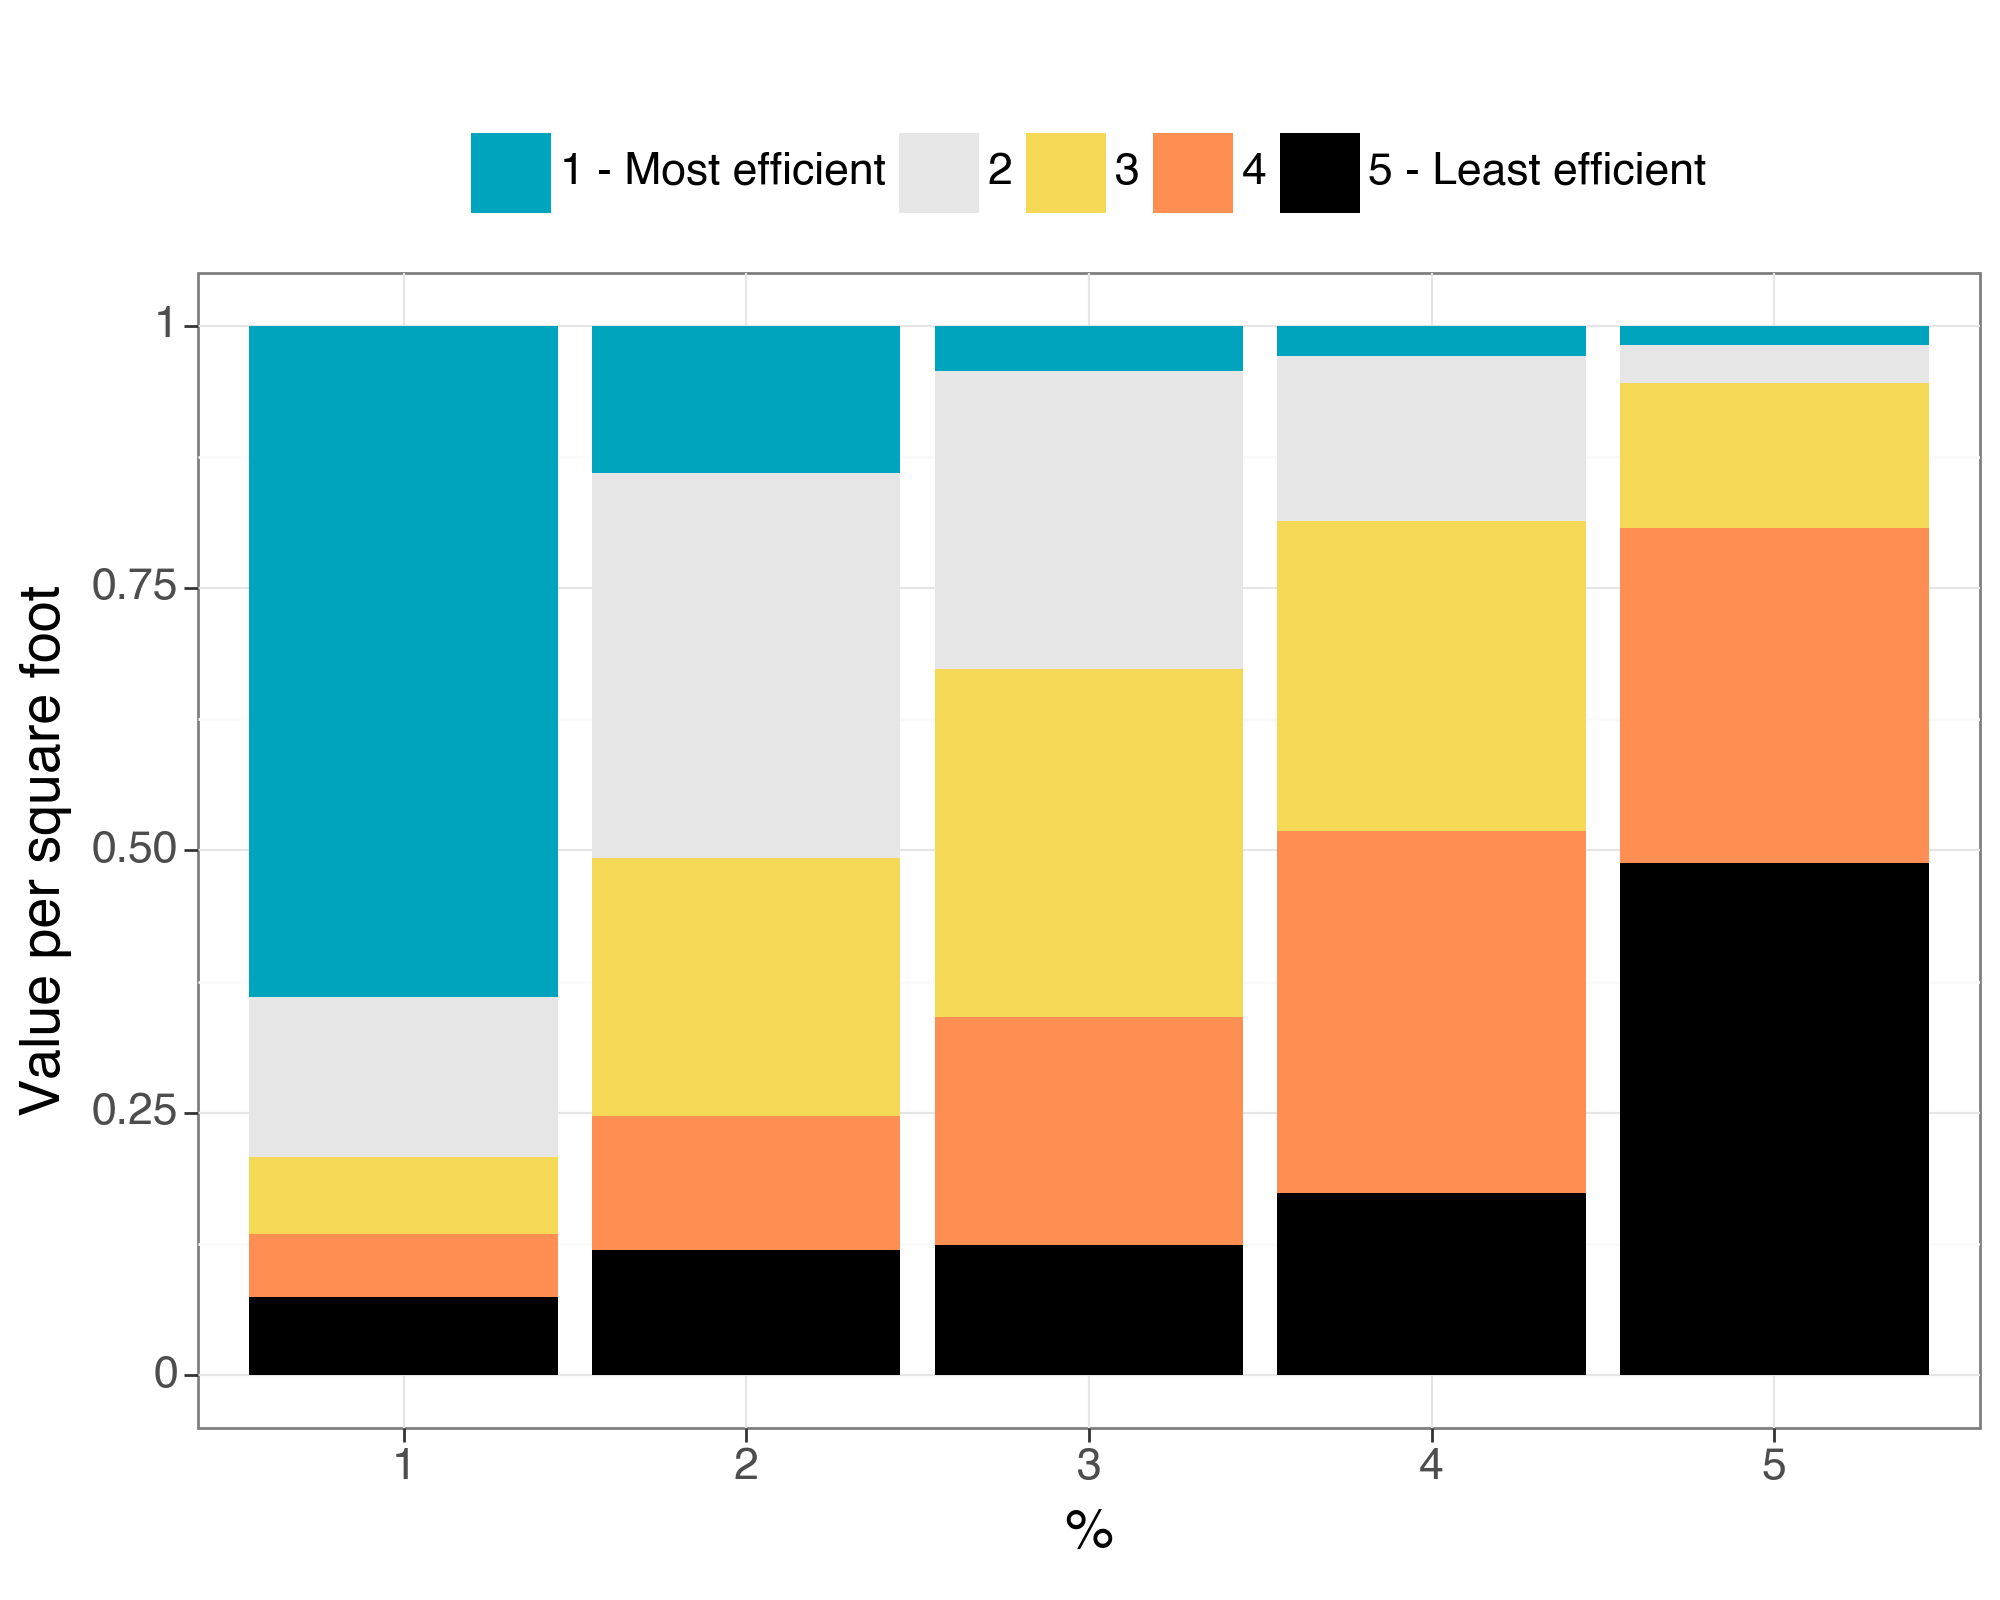

<Figure Size: (1000 x 800)>

In [15]:
(ggplot(ghg, aes(fill = "unit_co2_quintile", x = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "Value per square foot", x = "%") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

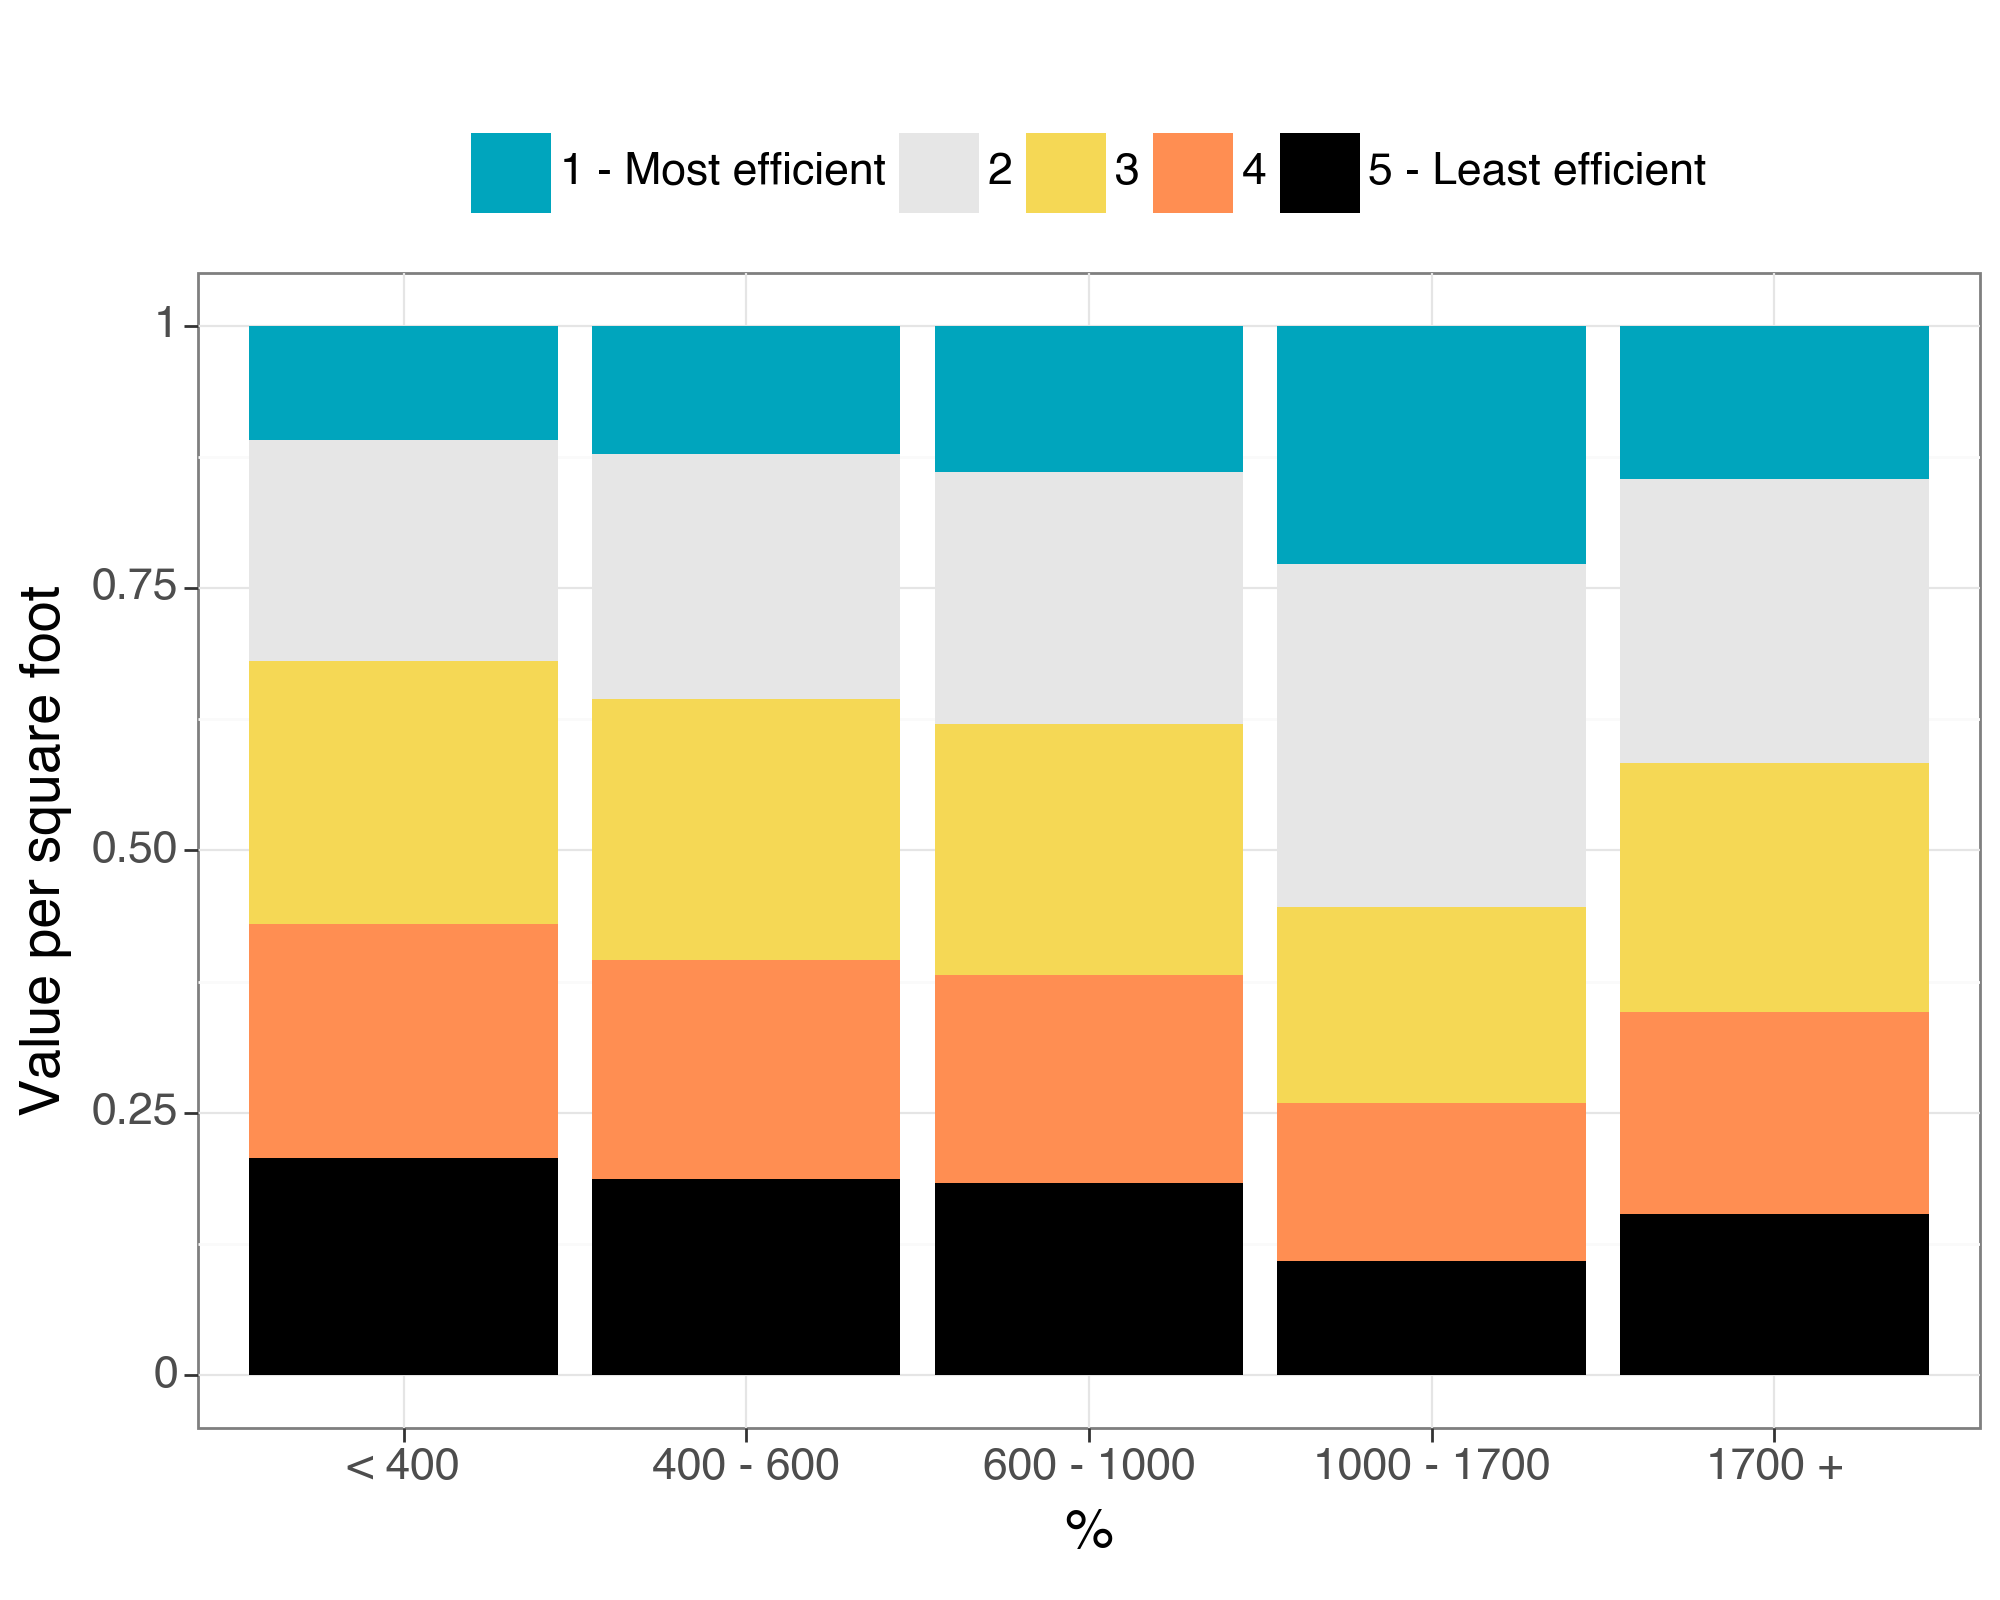

<Figure Size: (1000 x 800)>

In [16]:
(ggplot(ghg, aes(x = "price_sqft_cat", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "Value per square foot", x = "%") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

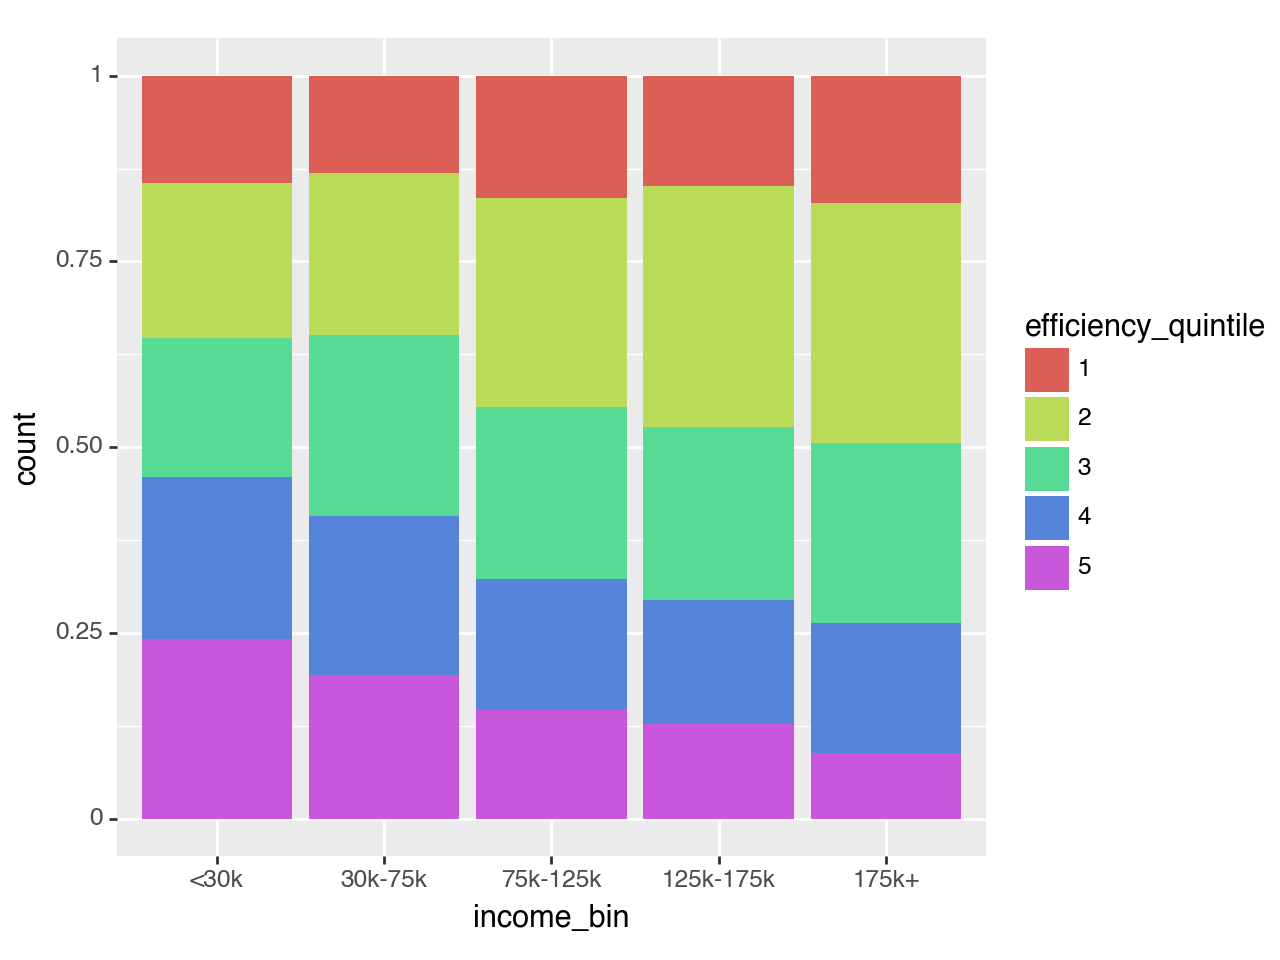

<Figure Size: (640 x 480)>

In [17]:
(ggplot(ghg, aes(x = "income_bin", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill"))

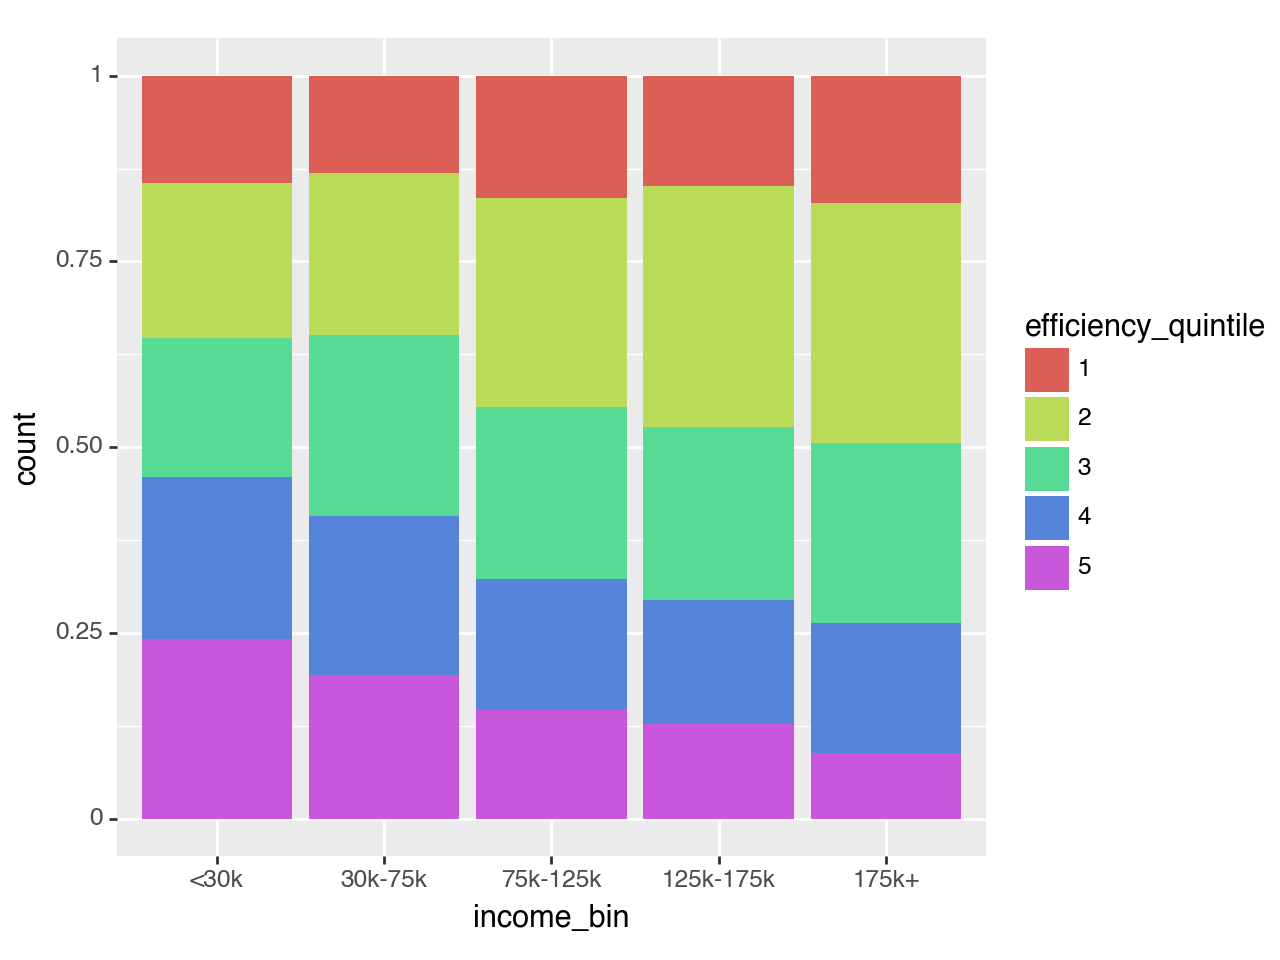

<Figure Size: (640 x 480)>

In [18]:
(ggplot(ghg, aes(x = "income_bin", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill"))

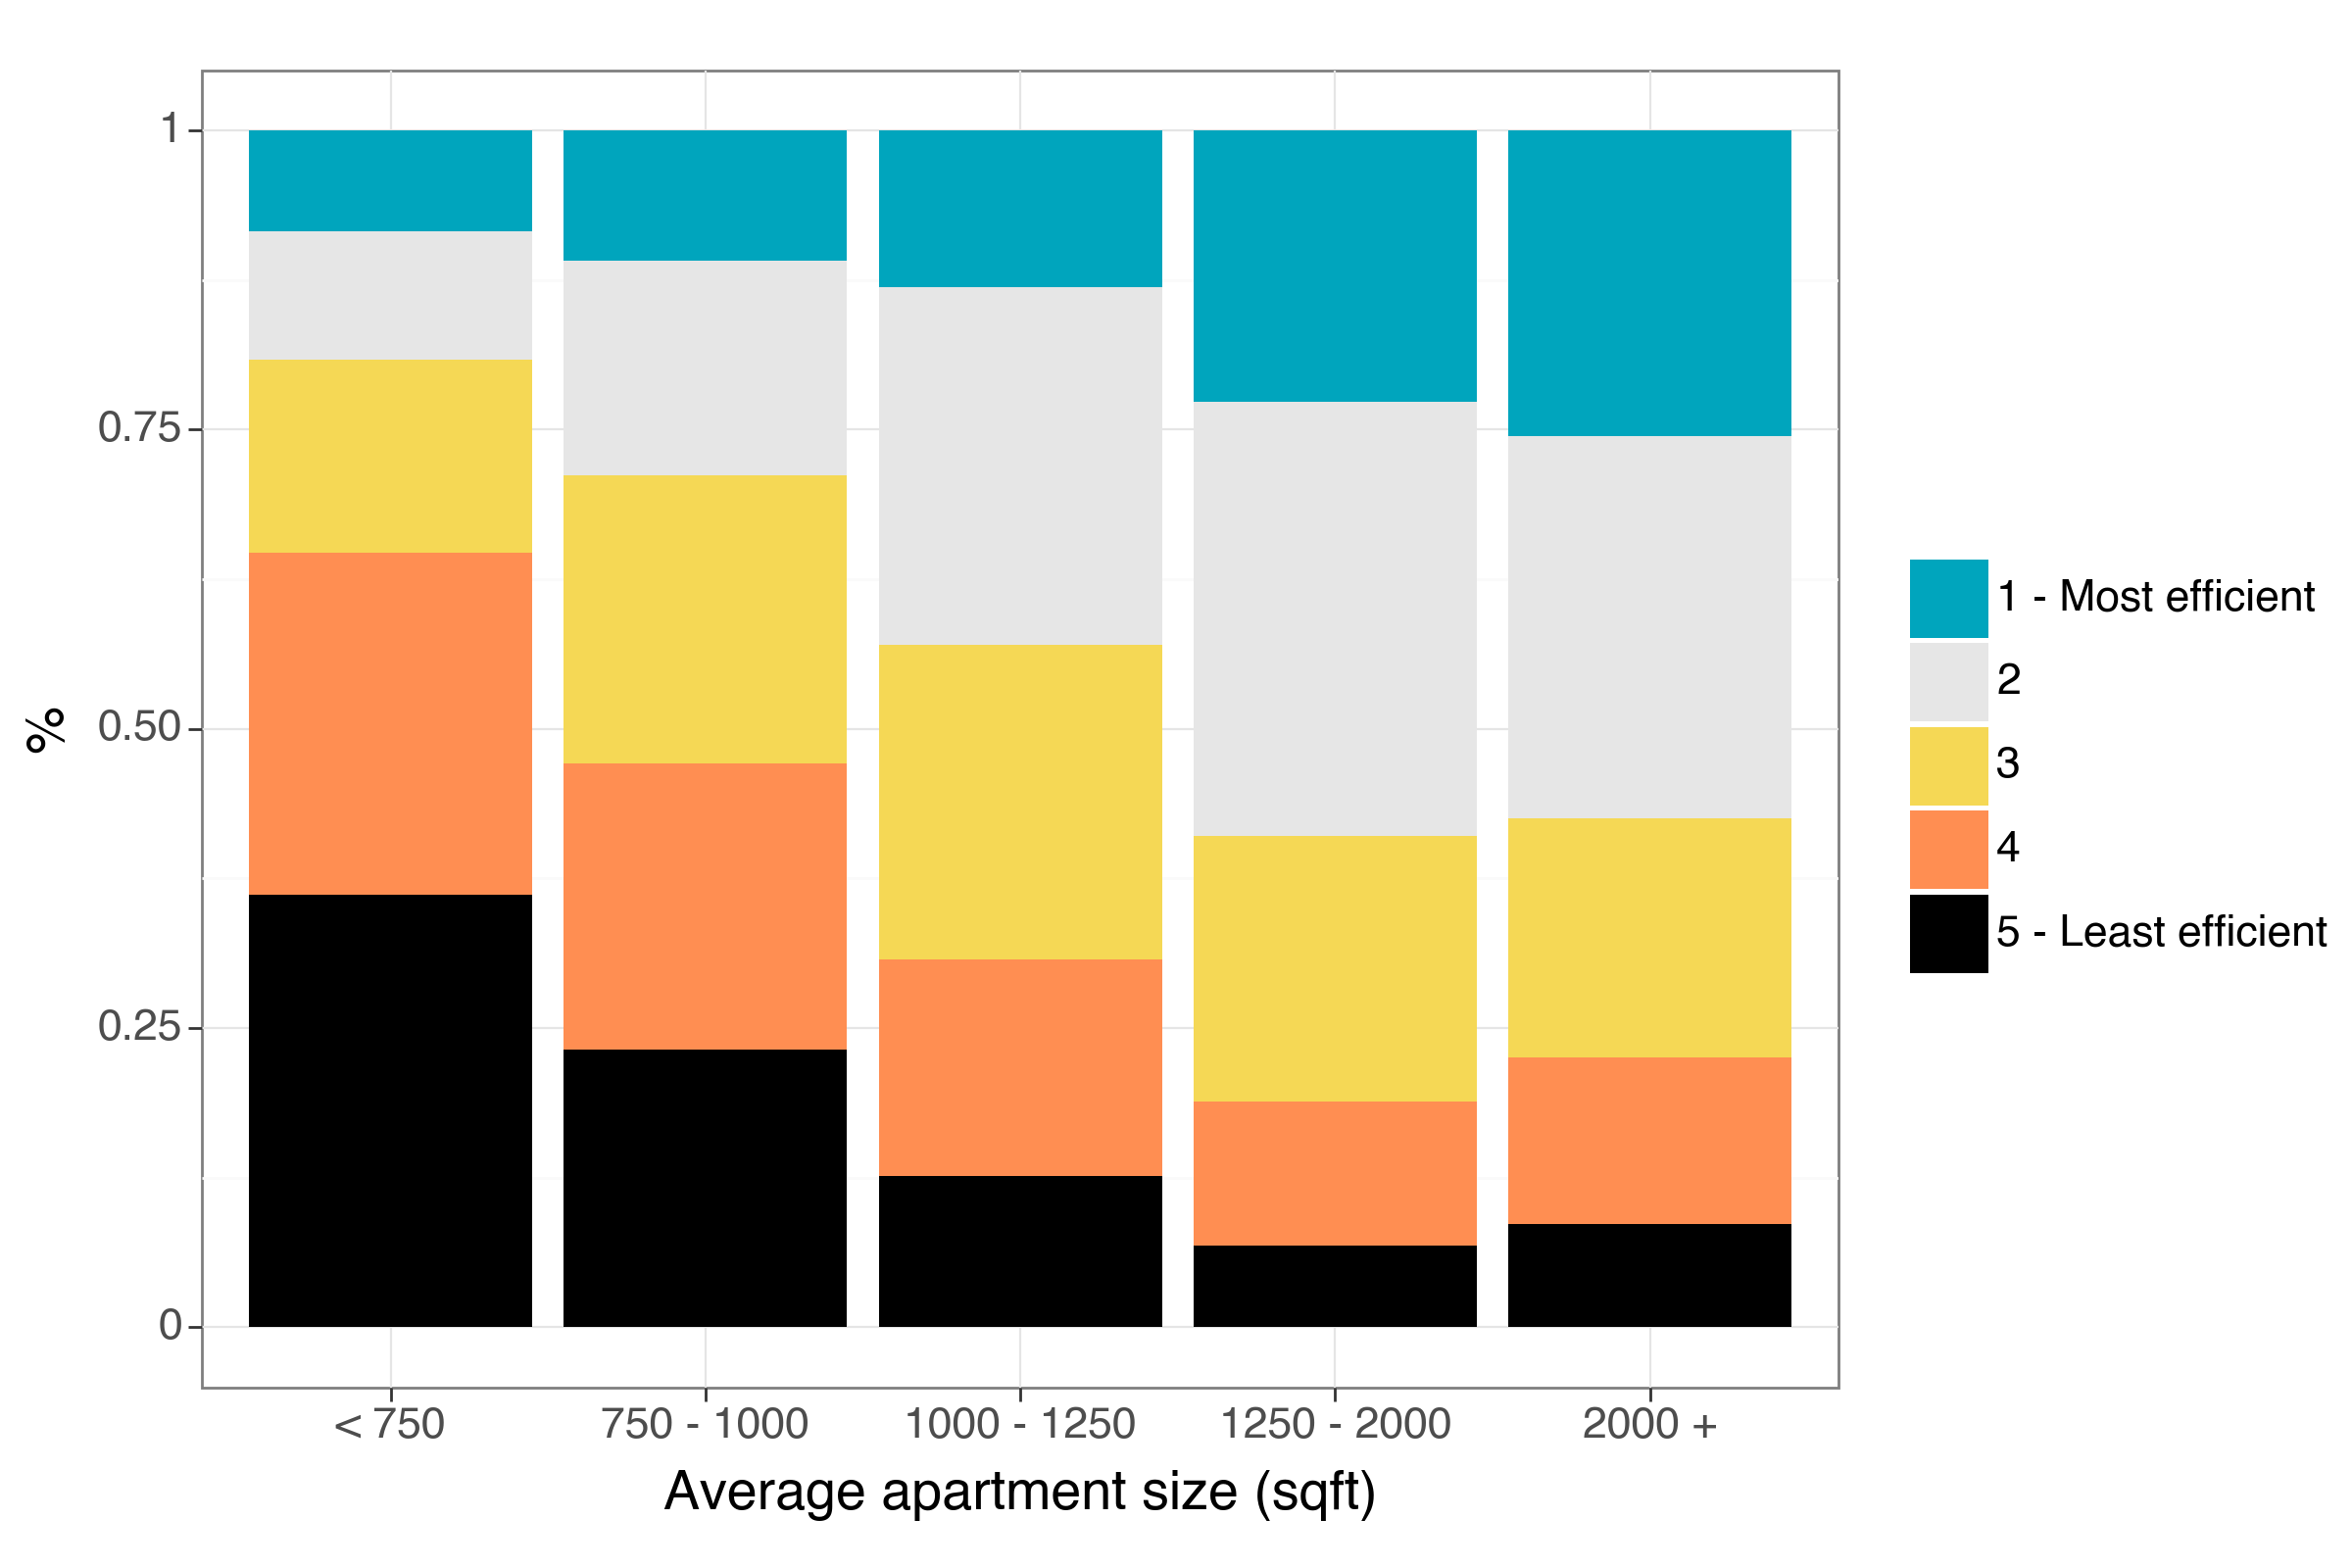

<Figure Size: (1200 x 800)>

In [19]:
(ggplot(ghg, aes(x = "apt_size_cat", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(x = "Average apartment size (sqft)", y = "%") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

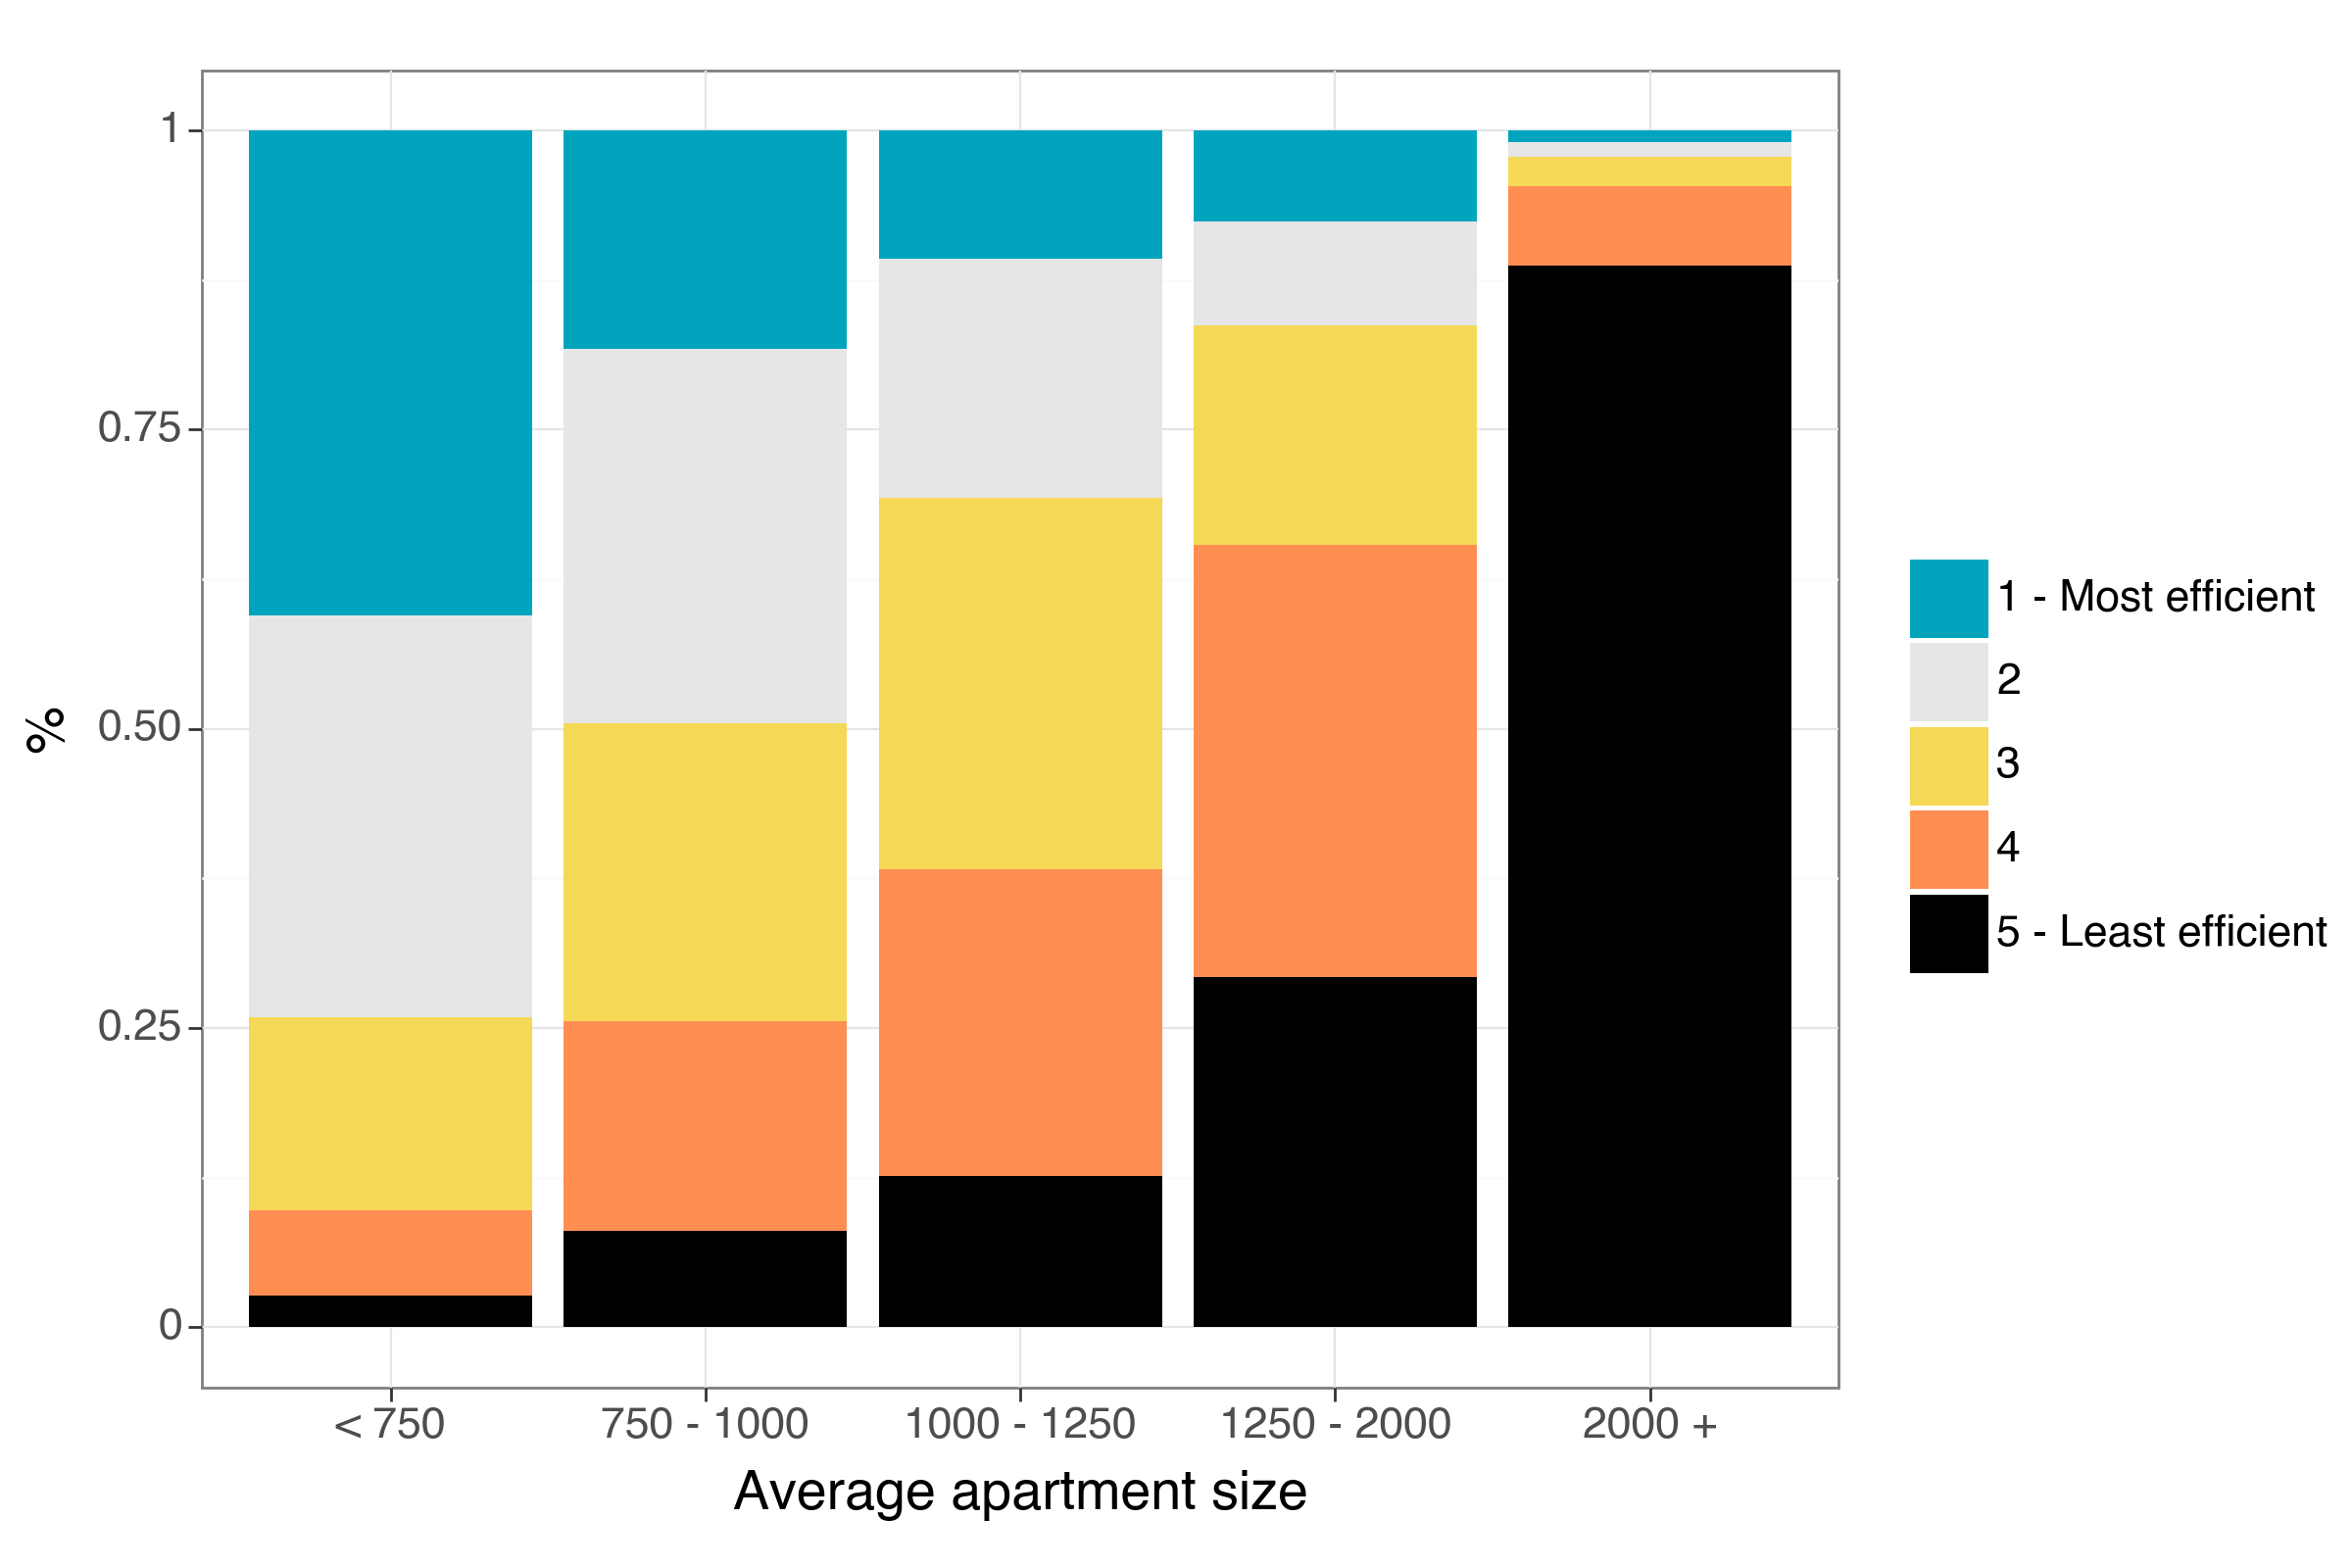

<Figure Size: (1200 x 800)>

In [20]:
(ggplot(ghg, aes(x = "apt_size_cat", fill = "unit_co2_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "%", x = "Average apartment size") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_12980/1800035807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


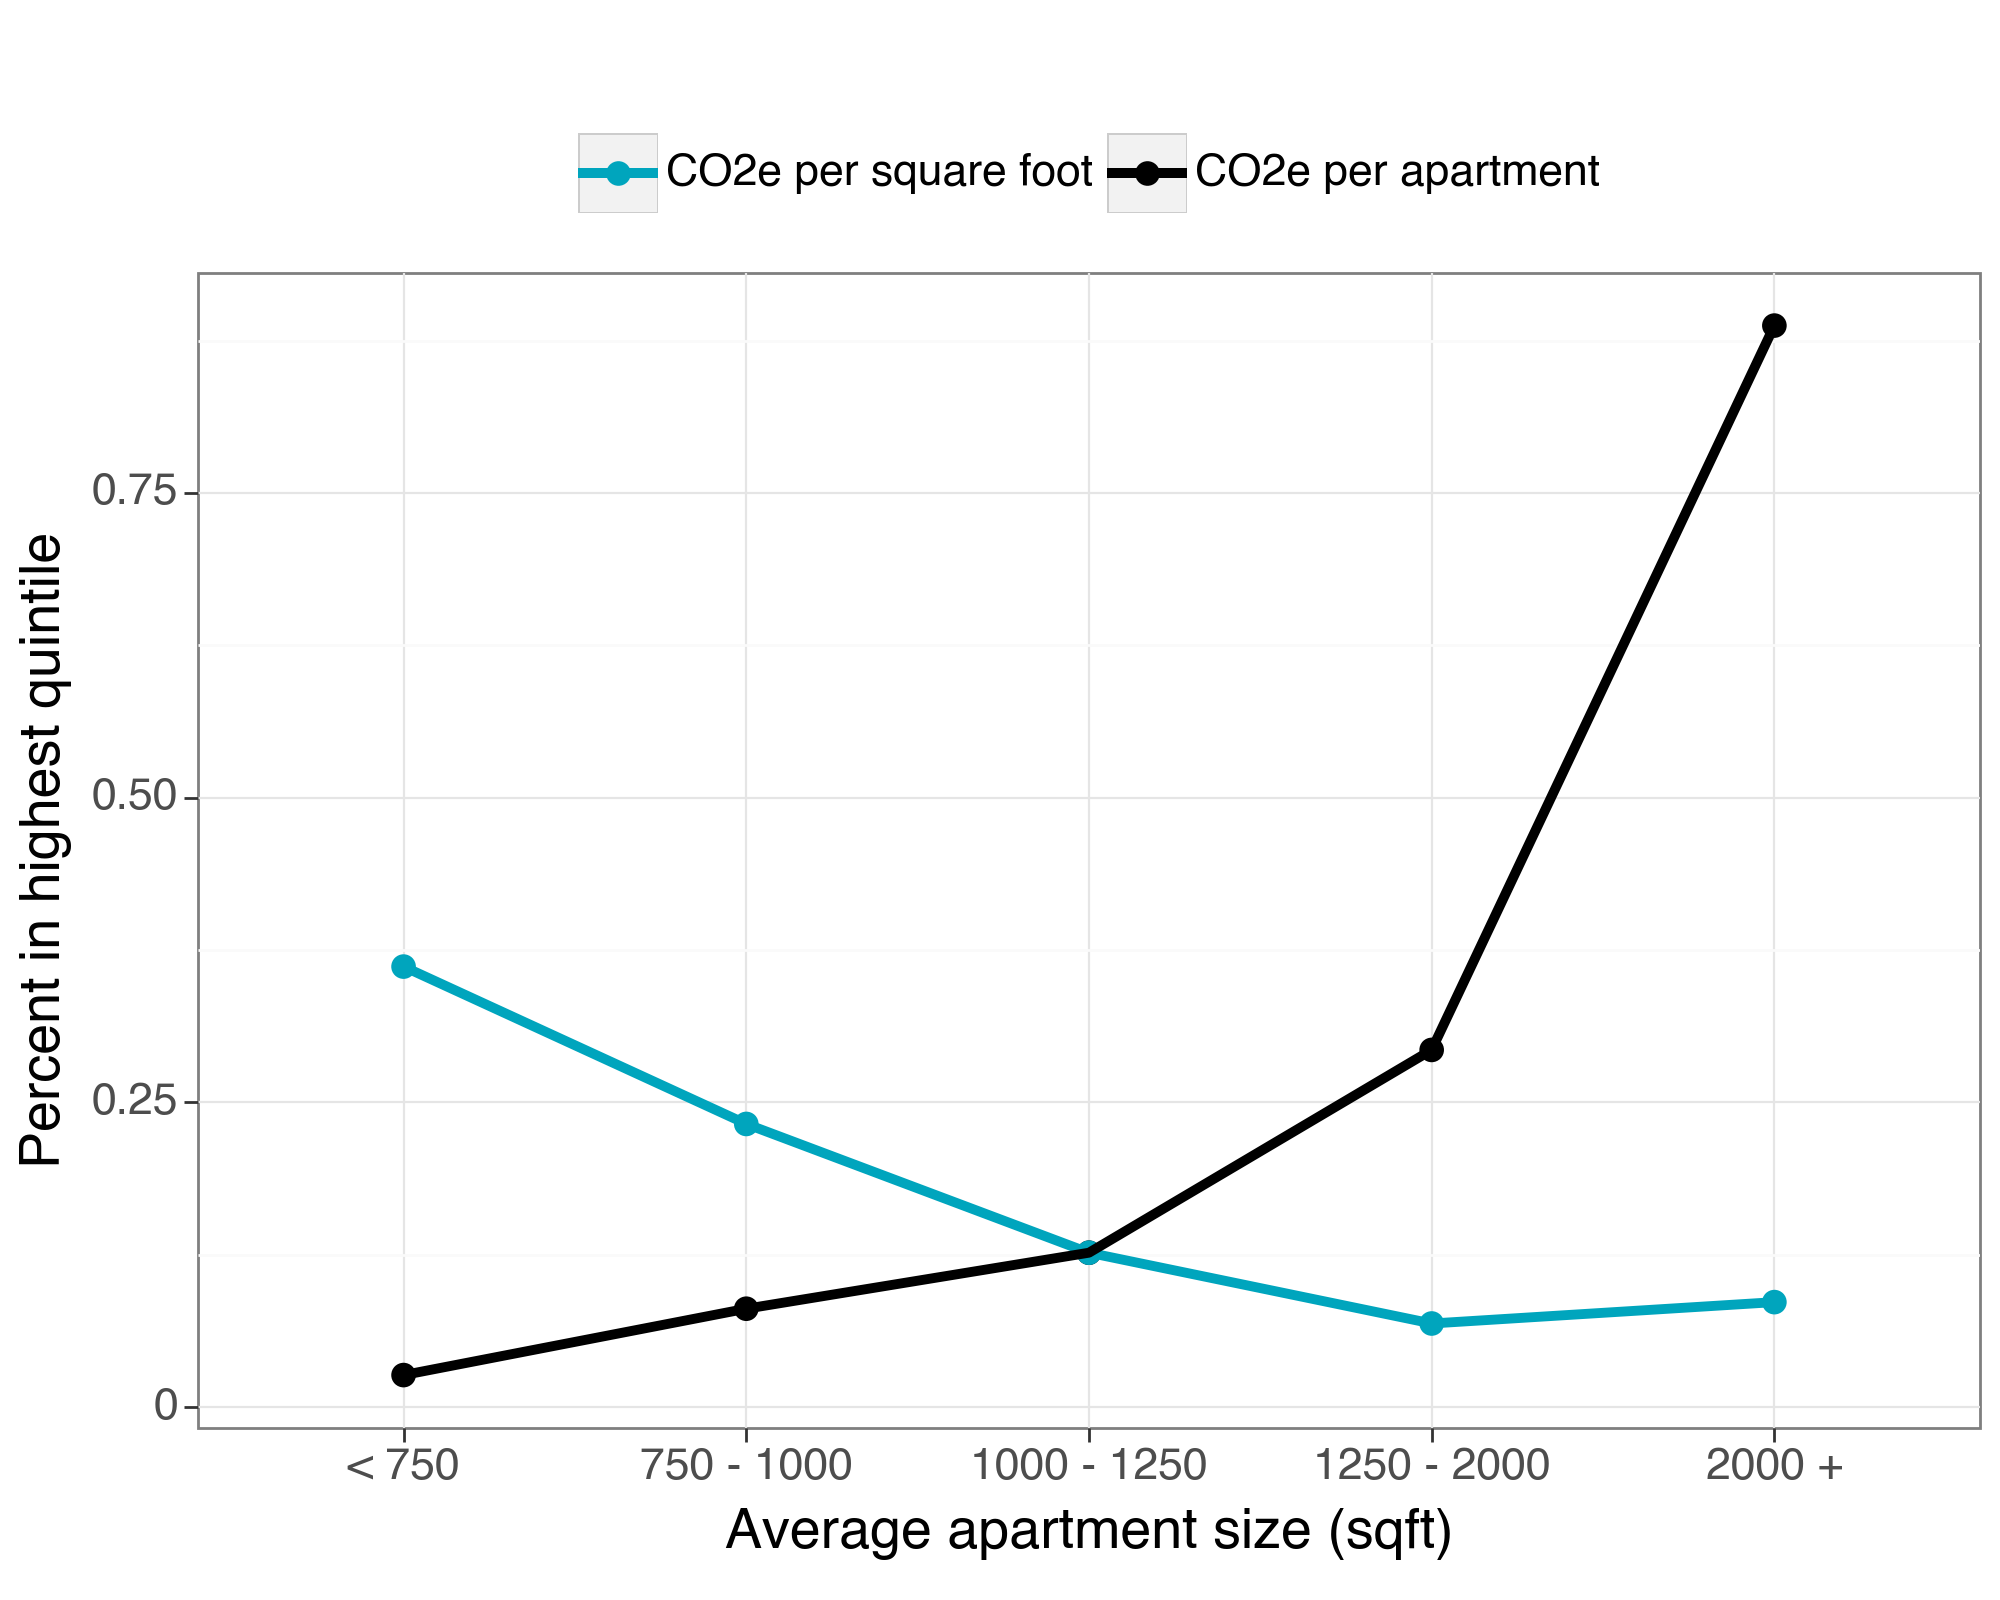

<Figure Size: (1000 x 800)>

In [21]:
plot_dat = ghg.groupby("apt_size_cat").agg({"bottom_quint_unit" : "mean", "bottom_quint" : "mean"}).reset_index().melt(id_vars = "apt_size_cat")
(ggplot(plot_dat, aes(x = "apt_size_cat", y = "value", color = "variable", group = "variable")) +
 geom_point(size = 4) +
 geom_line(size = 2) +
 scale_color_manual(name = " ", values = ["#00a5bd", "#000000"], labels = ["CO2e per square foot", "CO2e per apartment"]) +
 labs(y = "Percent in highest quintile", x = "Average apartment size (sqft)") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

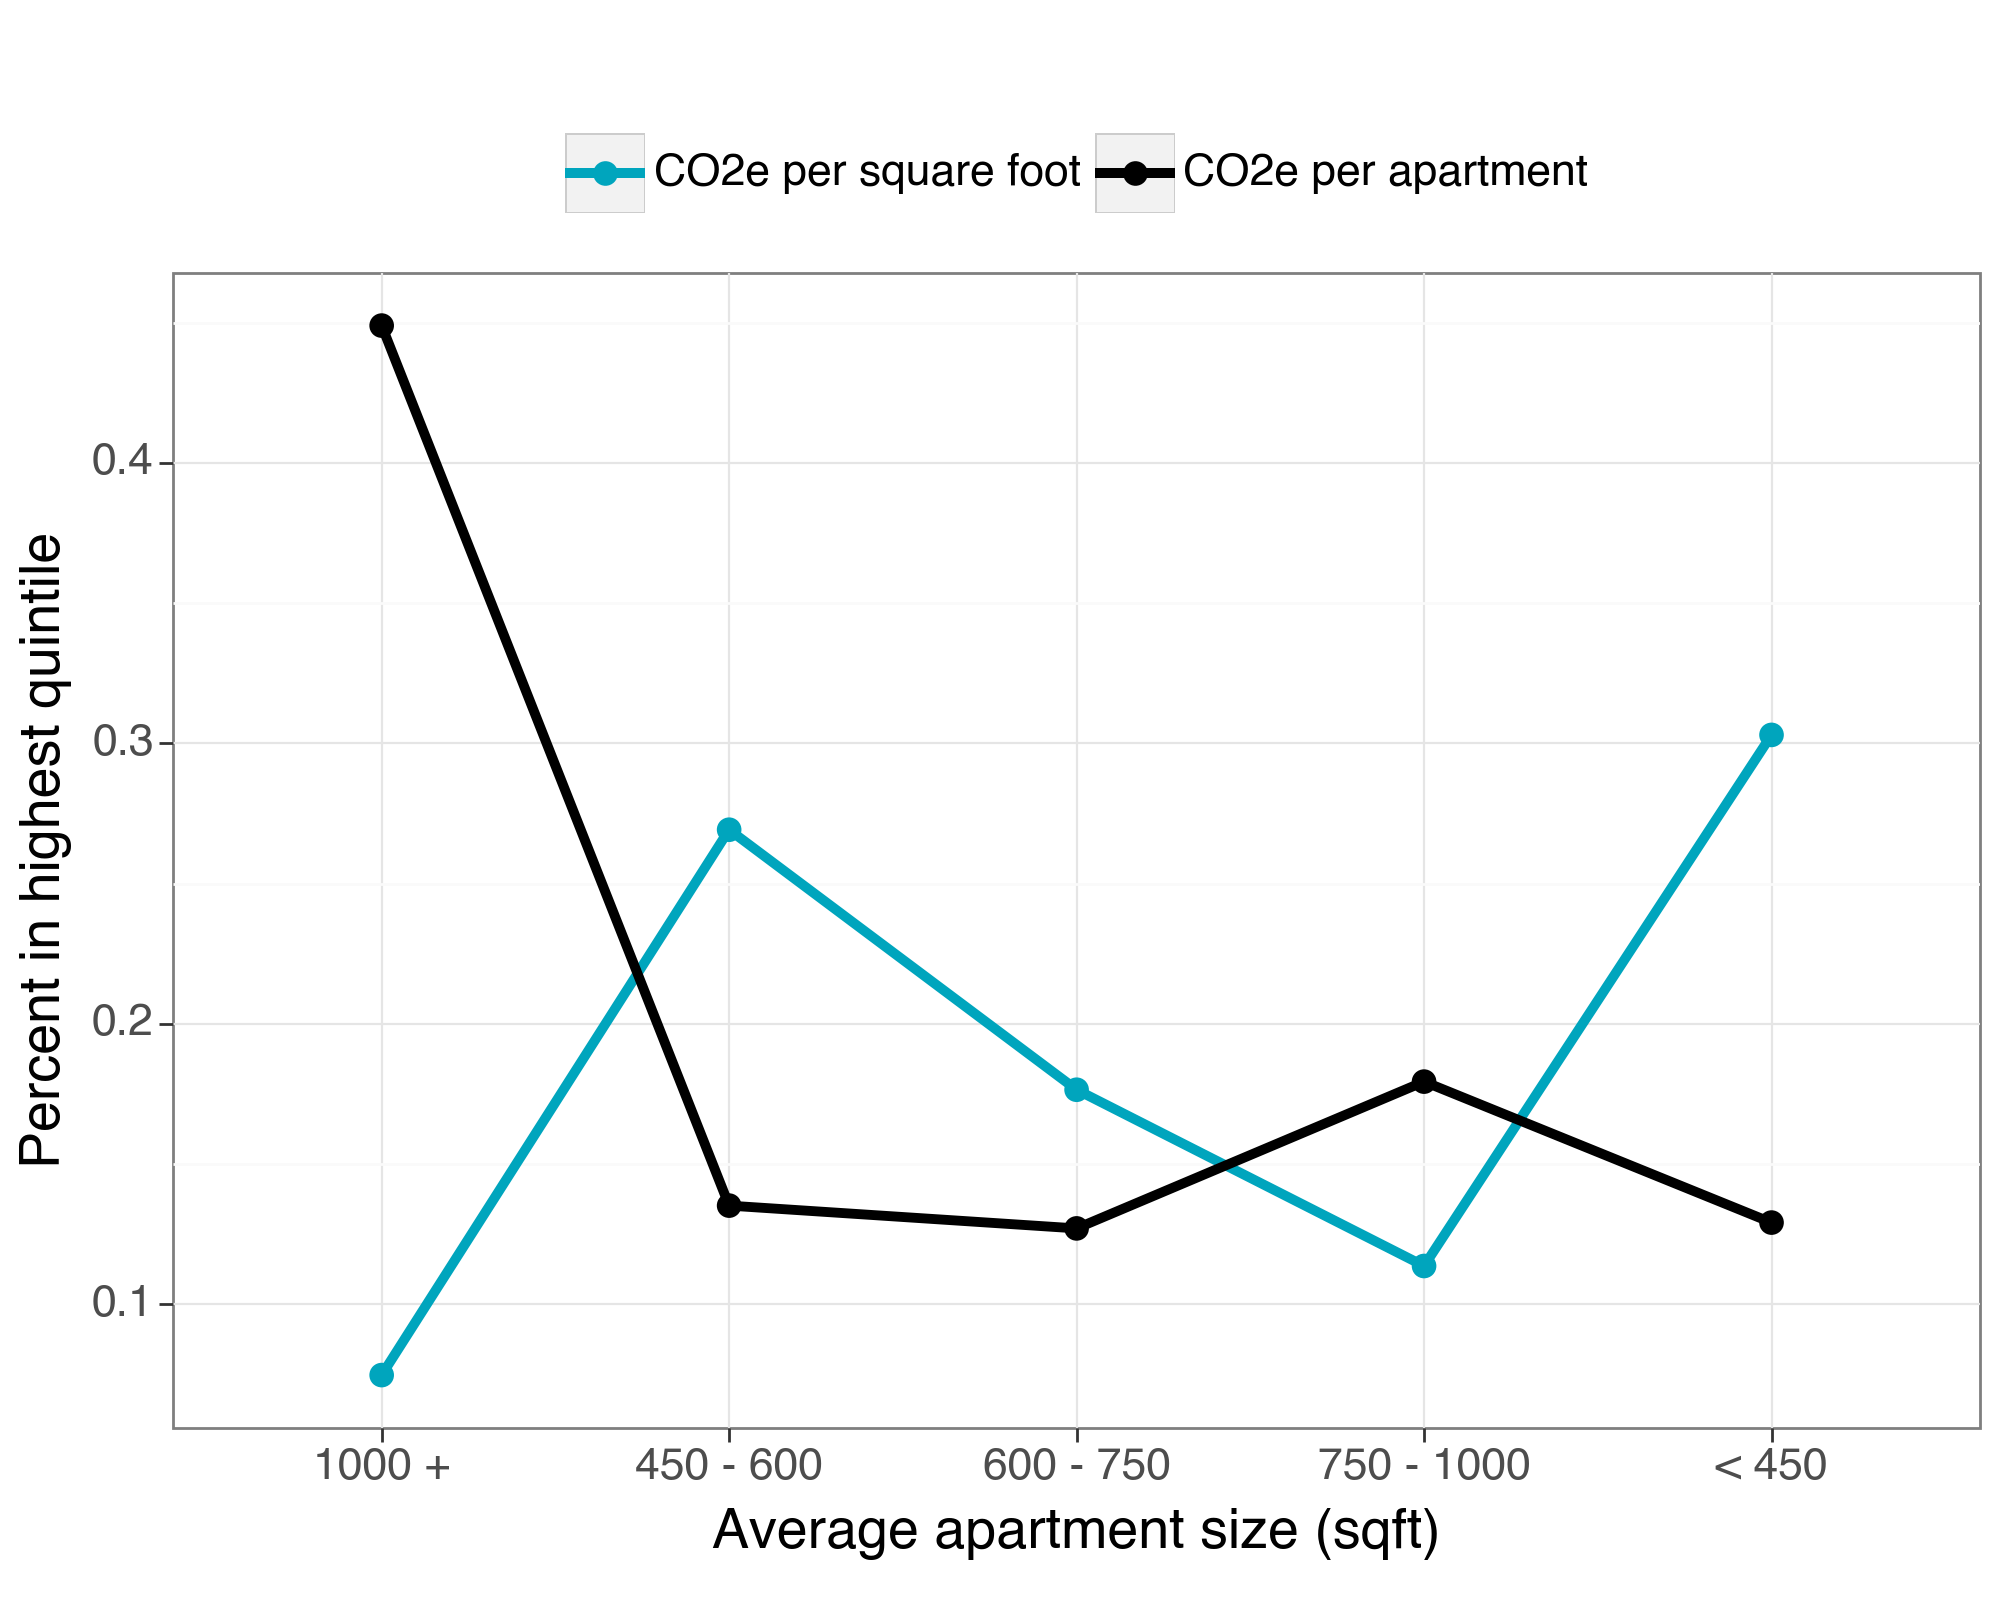

<Figure Size: (1000 x 800)>

In [22]:
plot_dat = ghg.groupby("sqft_bedroom_cat").agg({"bottom_quint_unit" : "mean", "bottom_quint" : "mean"}).reset_index().melt(id_vars = "sqft_bedroom_cat")
(ggplot(plot_dat, aes(x = "sqft_bedroom_cat", y = "value", color = "variable", group = "variable")) +
 geom_point(size = 4) +
 geom_line(size = 2) +
 scale_color_manual(name = " ", values = ["#00a5bd", "#000000"], labels = ["CO2e per square foot", "CO2e per apartment"]) +
 labs(y = "Percent in highest quintile", x = "Average apartment size (sqft)") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_12980/1800035807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


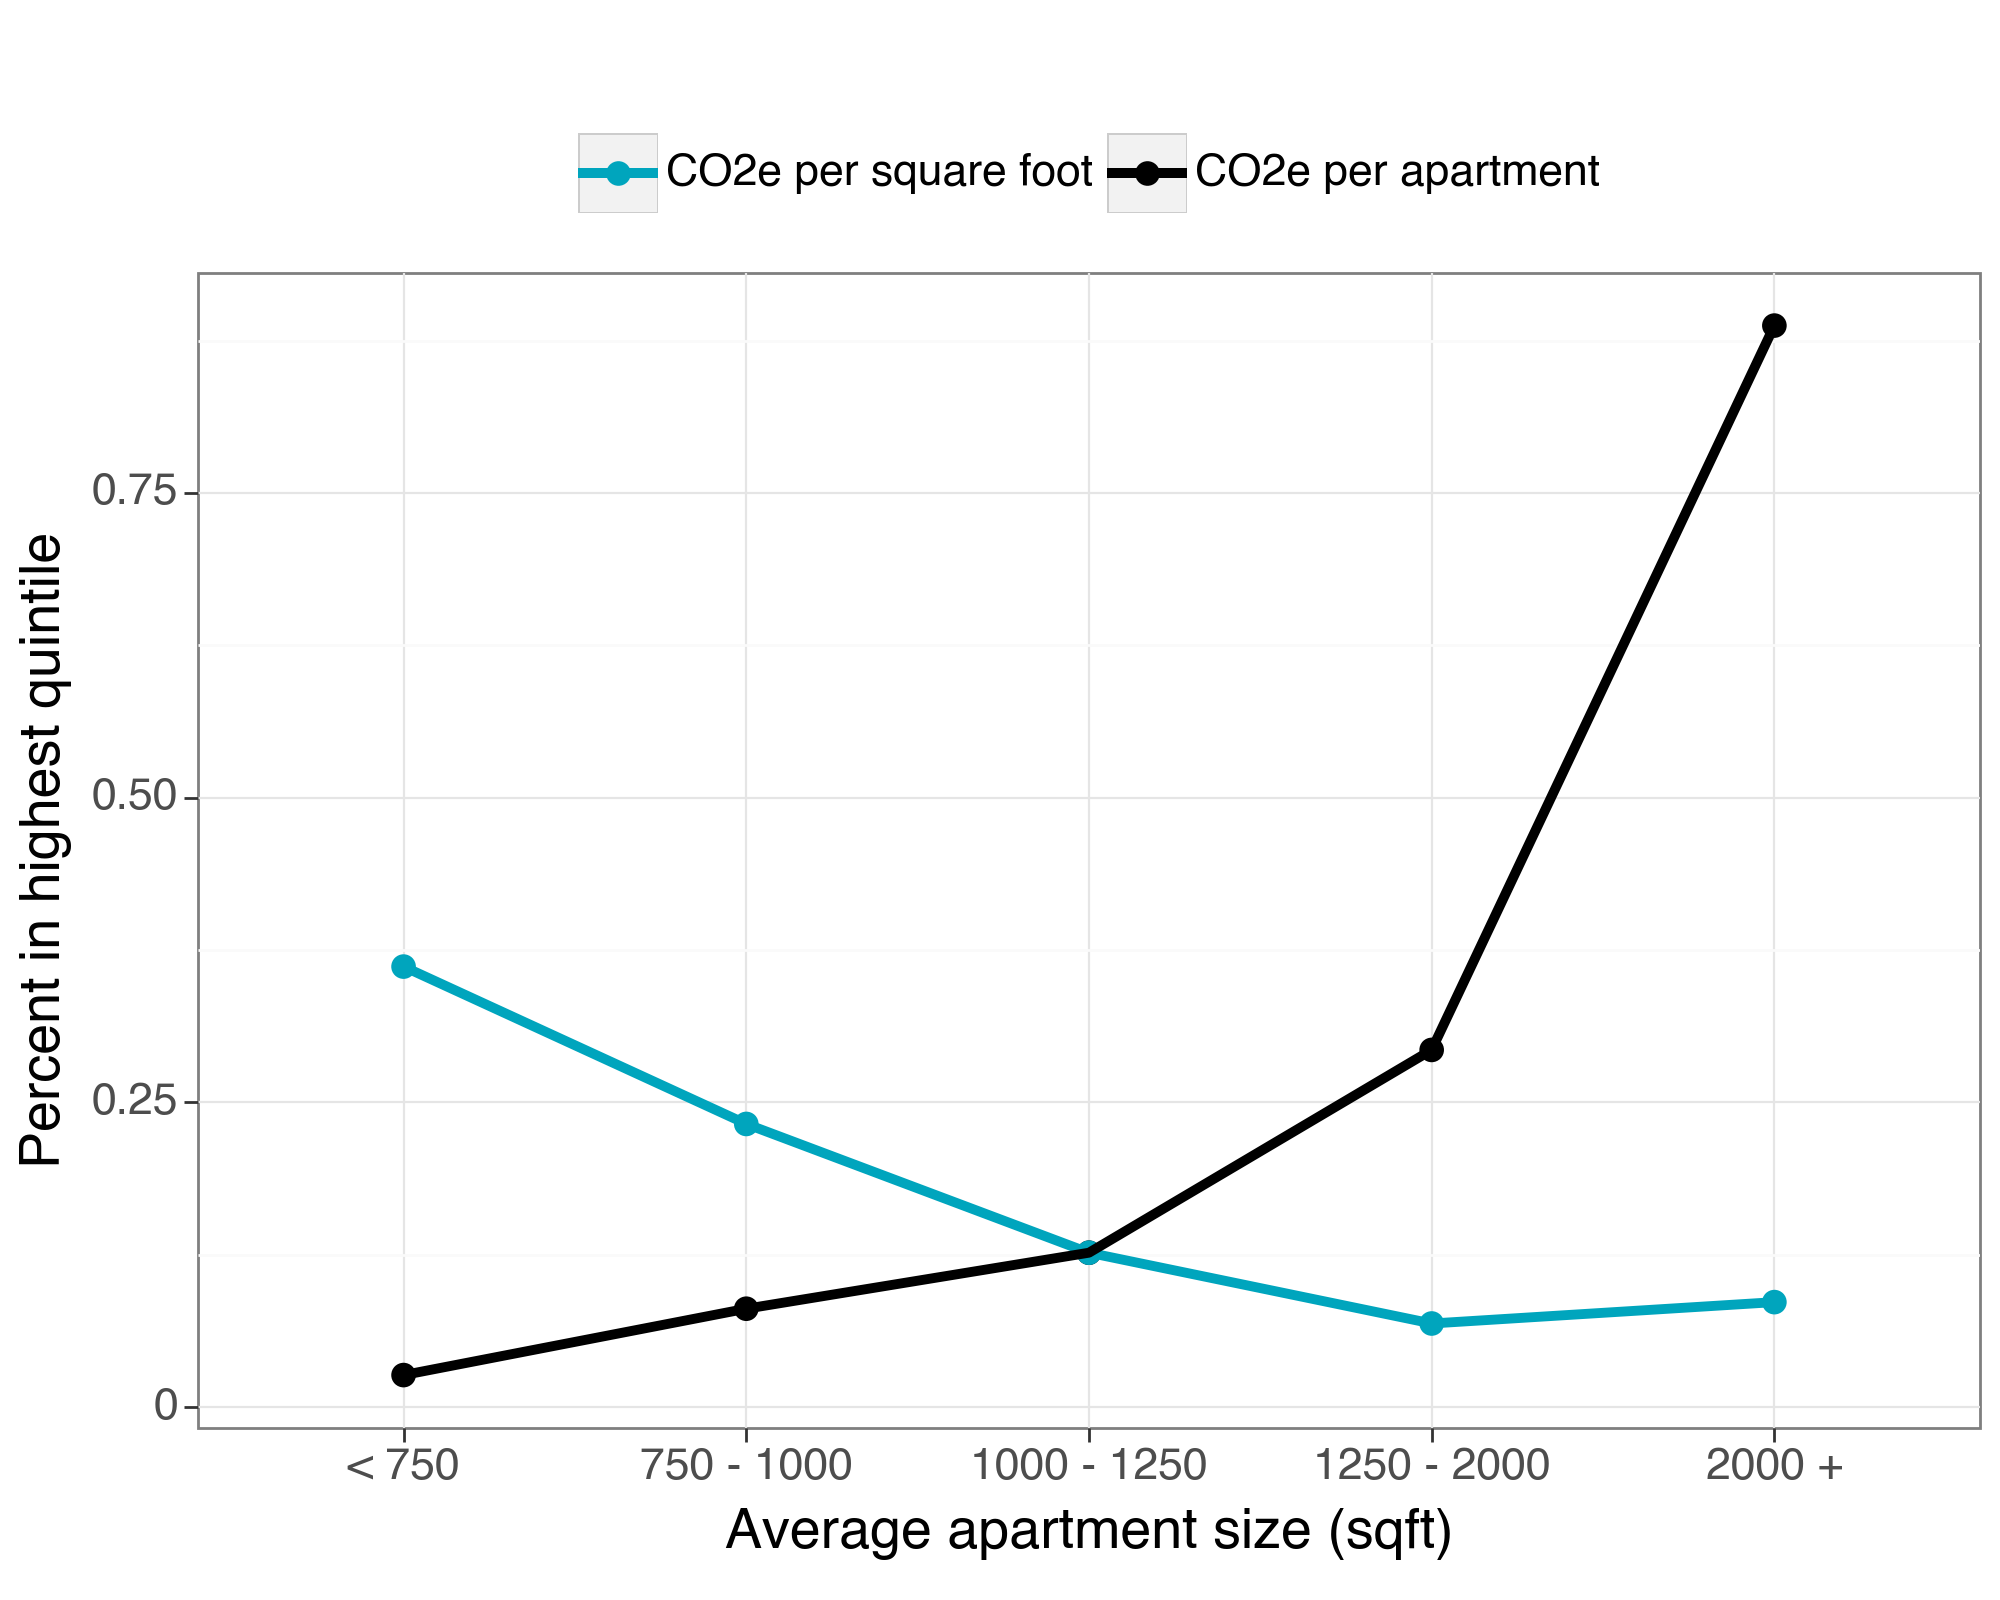

<Figure Size: (1000 x 800)>

In [23]:
plot_dat = ghg.groupby("apt_size_cat").agg({"bottom_quint_unit" : "mean", "bottom_quint" : "mean"}).reset_index().melt(id_vars = "apt_size_cat")
(ggplot(plot_dat, aes(x = "apt_size_cat", y = "value", color = "variable", group = "variable")) +
 geom_point(size = 4) +
 geom_line(size = 2) +
 scale_color_manual(name = " ", values = ["#00a5bd", "#000000"], labels = ["CO2e per square foot", "CO2e per apartment"]) +
 labs(y = "Percent in highest quintile", x = "Average apartment size (sqft)") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 29 rows containing missing values.


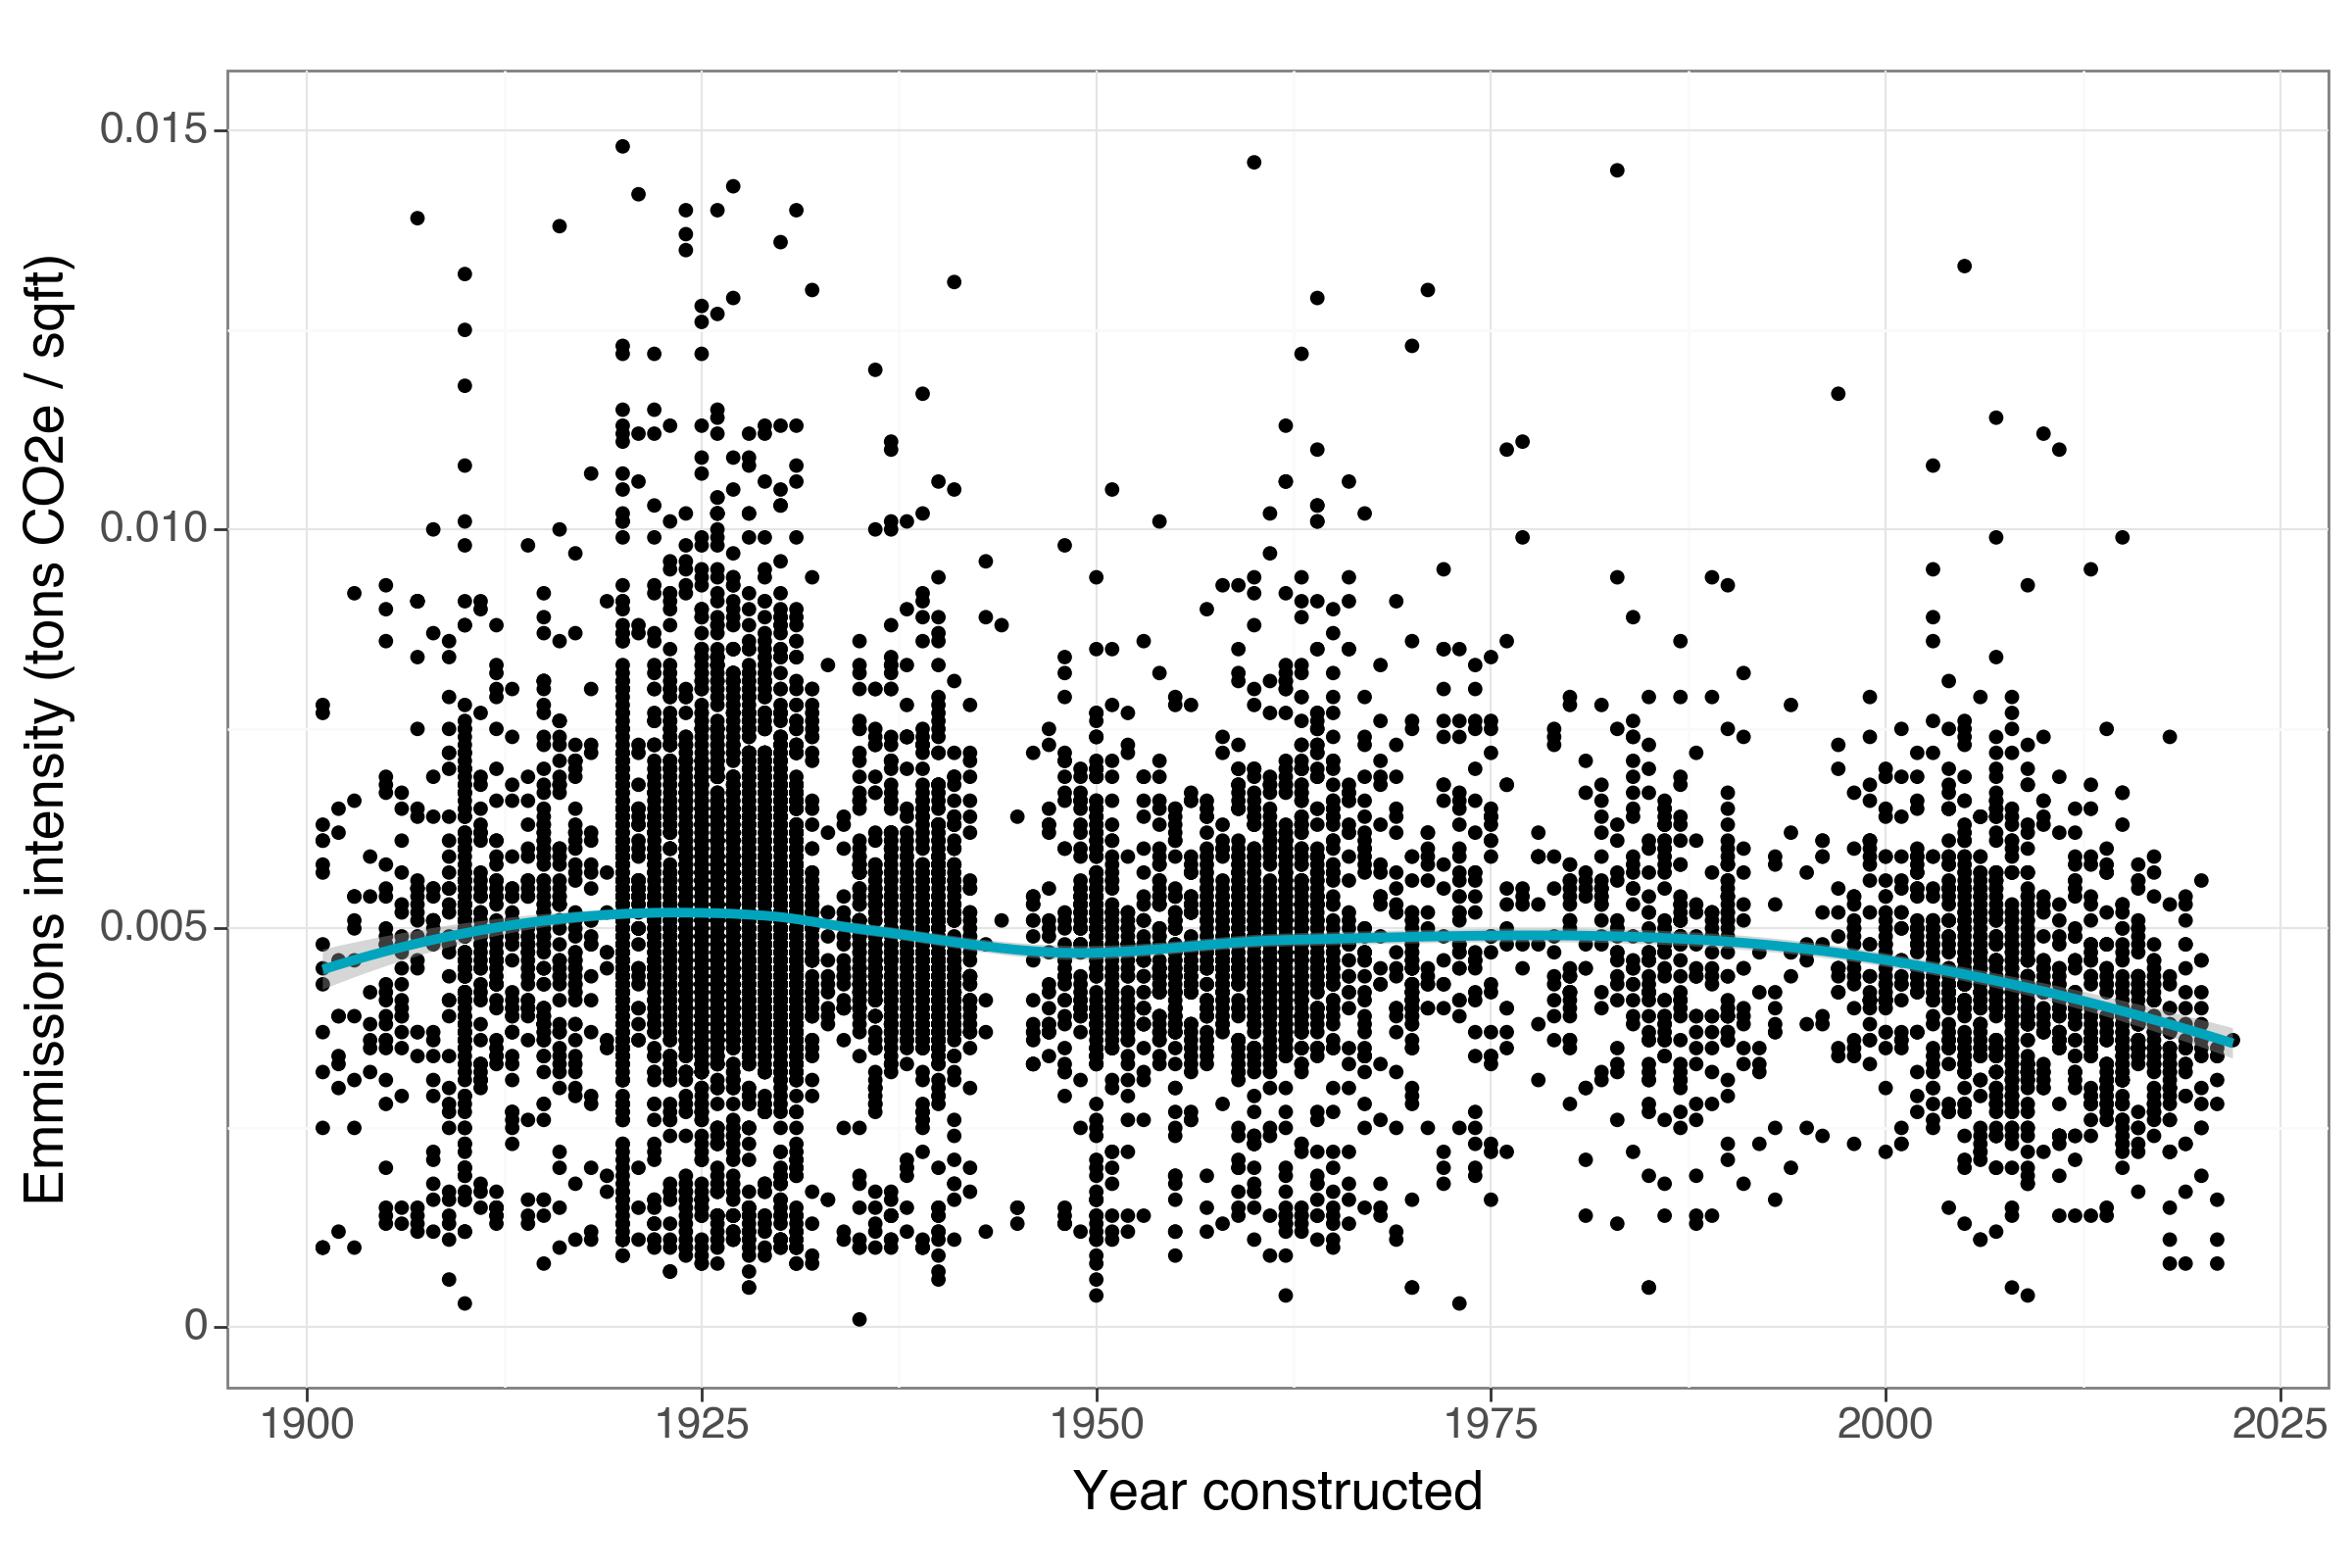

<Figure Size: (1200 x 800)>

In [24]:
(ggplot(ghg.query("year_built > 1900 & year_built < 2024"), aes(x = "year_built", y = "co2_tons_sq")) +
 geom_point(size =2) + 
 geom_smooth(method = "loess", color = colors[0], size = 2) + 
 ylim(0, .015) +
 labs(y = "Emmissions intensity (tons CO2e / sqft)", x = "Year constructed") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

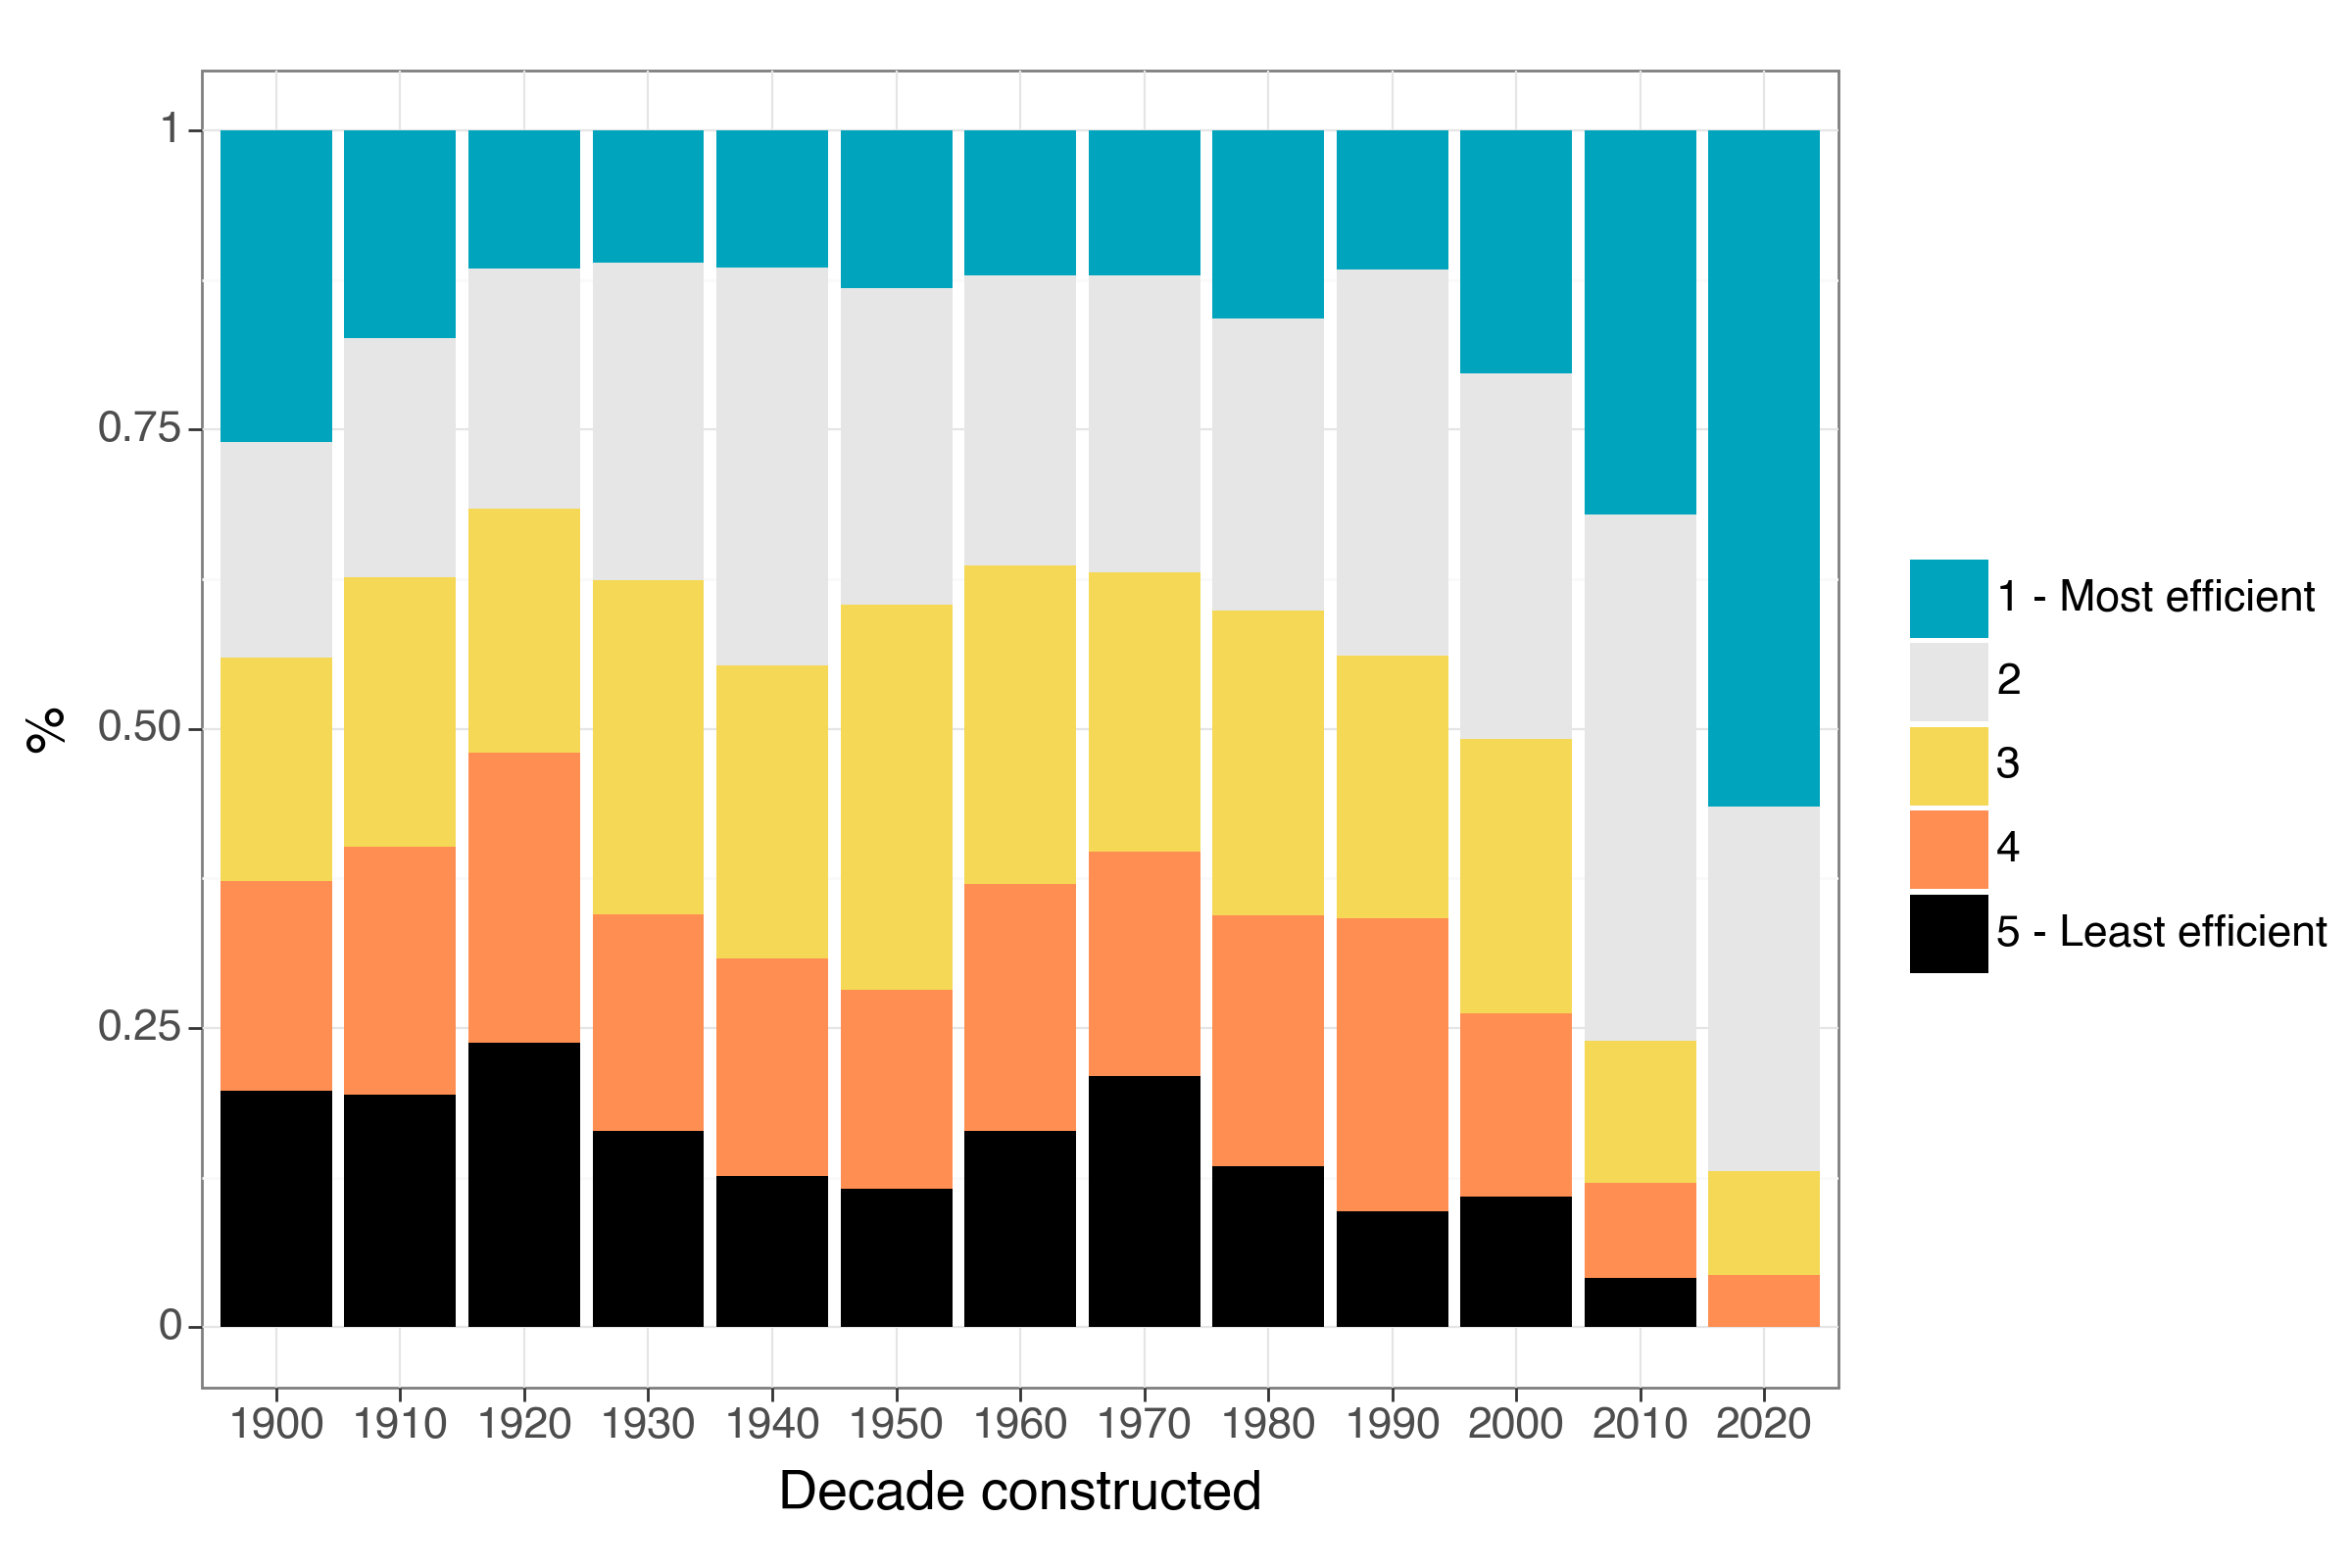

<Figure Size: (1200 x 800)>

In [25]:
ghg["decade_built"] = ghg['decade_built'].astype(str)
(ggplot(ghg.query("year_built > 1900 & year_built < 2024"), aes(x = "decade_built", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "%", x = "Decade constructed") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

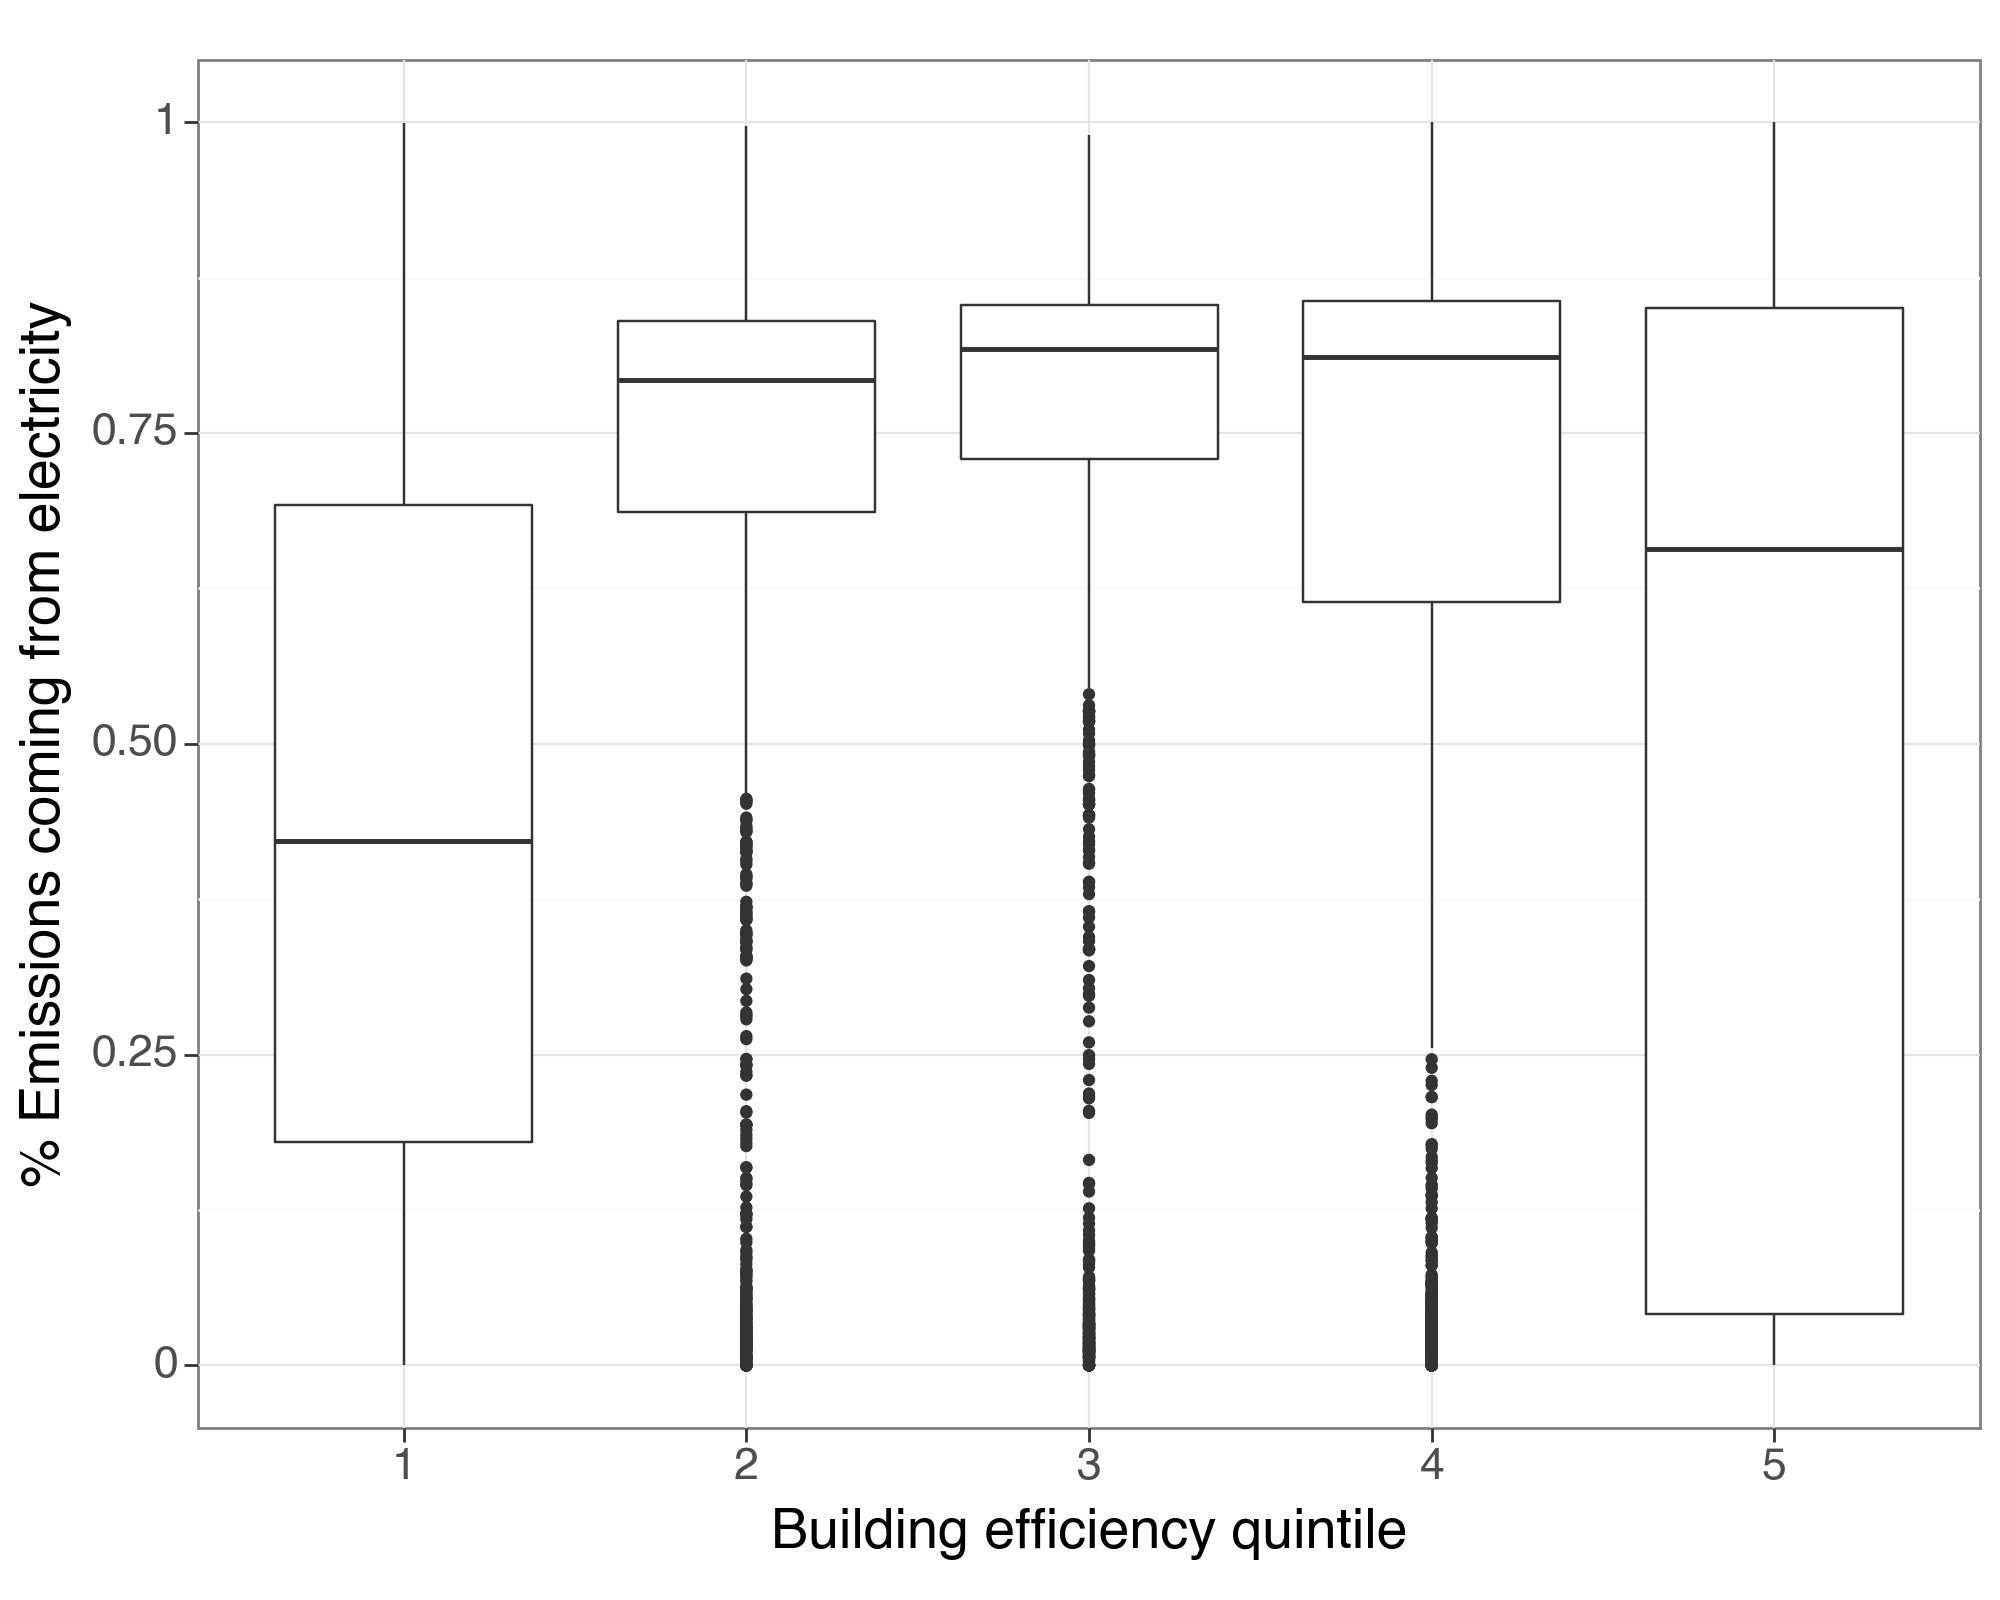

<Figure Size: (1000 x 800)>

In [26]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "natural_gas_energy_pct")) +
 geom_boxplot() +
 labs(y = "% Emissions coming from electricity", x = "Building efficiency quintile") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [27]:
plot_dat

,apt_size_cat,variable,value
0,< 750,bottom_quint_unit,0.026207
1,750 - 1000,bottom_quint_unit,0.080656
2,1000 - 1250,bottom_quint_unit,0.126621
3,1250 - 2000,bottom_quint_unit,0.293007
4,2000 +,bottom_quint_unit,0.887324
5,< 750,bottom_quint,0.361379
6,750 - 1000,bottom_quint,0.232262
7,1000 - 1250,bottom_quint,0.126621
8,1250 - 2000,bottom_quint,0.068531
9,2000 +,bottom_quint,0.086072


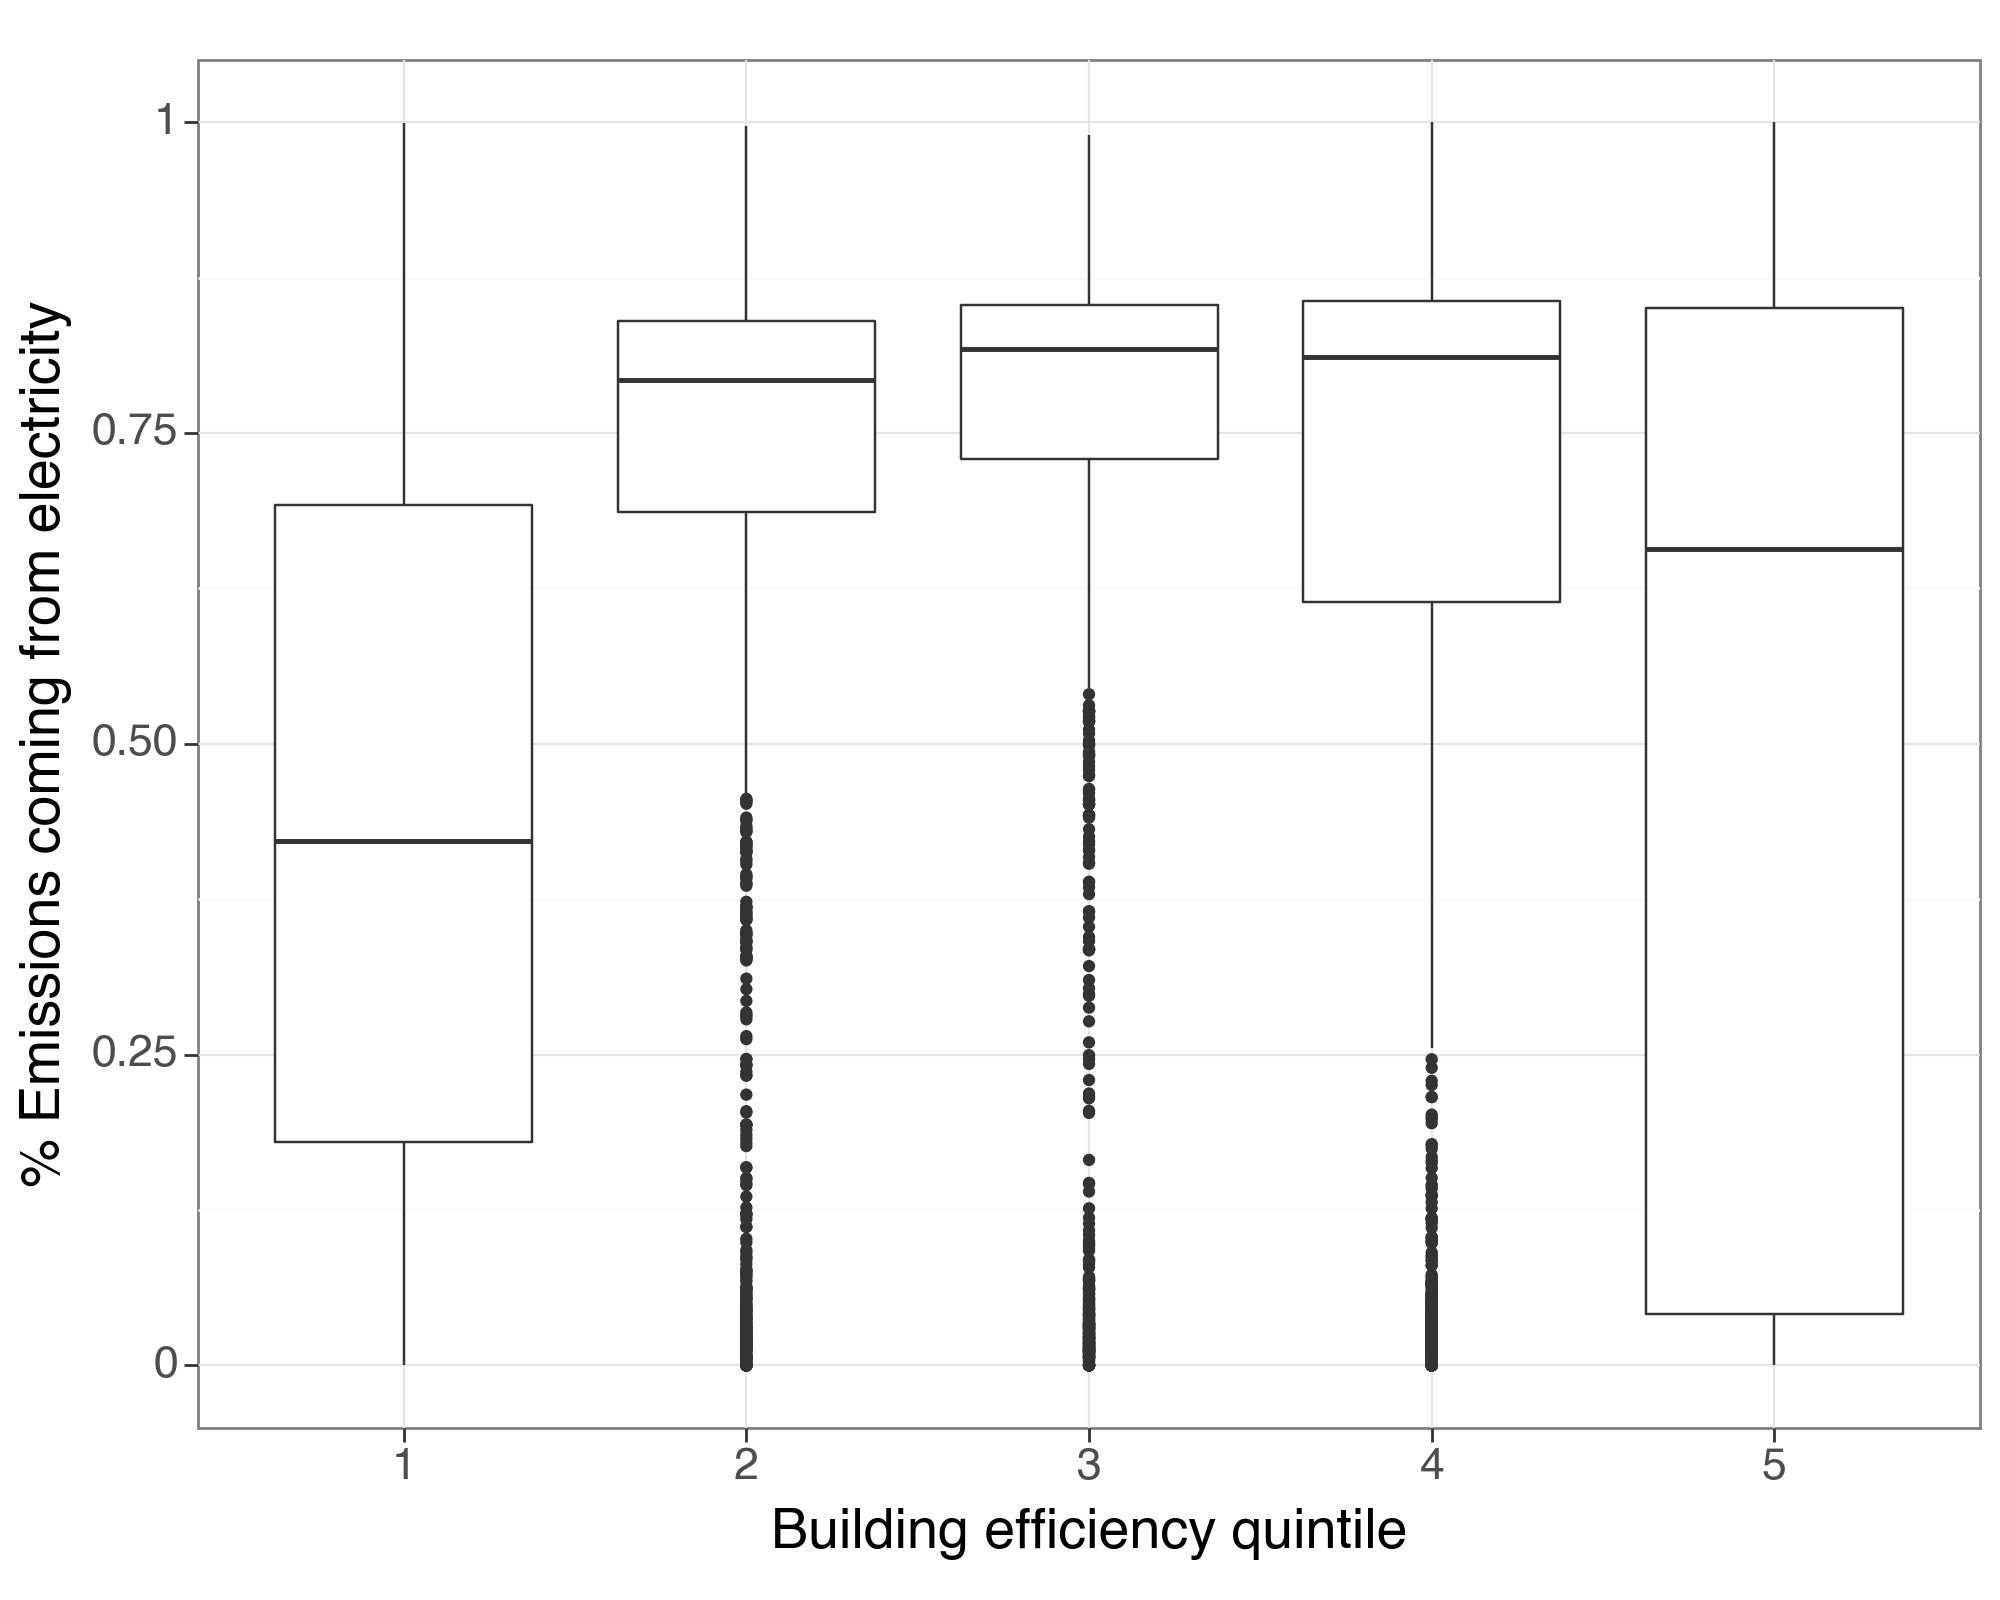

<Figure Size: (1000 x 800)>

In [28]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "natural_gas_energy_pct")) +
 geom_boxplot() +
 labs(y = "% Emissions coming from electricity", x = "Building efficiency quintile") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [29]:
ghg.columns

Index(['bbl', 'name', 'property id', 'total_units', 'eui', 'bedrooms',
       'housing_fa', 'total_fa', 'co2_intensity', 'total_co2', 'kwh',
       'gallons_water', 'latitude', 'longitude', 'year_built', 'occupancy',
       'unit_laundry_hookups', 'common_laundry_hookups', 'direct_emissions',
       'indirect_emissions', 'total_e', 'kwh_per_sqft', 'avg_apt_size',
       'e_per_apt', 'co2_tons_sq', 'co2_per_apt', 'co2_per_bedroom',
       'exceeds_2024_limit', 'exceeds_2030_limit', 'decade_built',
       'bedrooms_per_apt', 'sqft_per_bedroom', 'direct_emission_pct',
       'water_per_sqft', 'water_per_apt', 'laundry_per_apt', 'laundry_cat',
       'efficiency_quintile', 'unit_co2_quintile', 'bedroom_co2_quintile',
       'electricty_sqft_quintile', 'limit_category', 'apt_size_cat',
       'apt_size_cat2', 'sqft_bedroom_cat', 'state', 'county', 'tract',
       'total_population', 'pop_in_poverty', 'pop_black', 'pop_hispanic',
       'med_hh_inc', 'geoid', 'income_bin', 'income_q', 'total

In [30]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "electricity_pct")) +
 geom_boxplot() +
 labs(y = "% Emissions coming from electricity", x = "Building efficiency quintile") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

PlotnineError: "Could not evaluate the 'y' mapping: 'electricity_pct' (original error: name 'electricity_pct' is not defined)"

In [ ]:
(ggplot(ghg.groupby("income_bin")["avg_apt_size"].mean().reset_index(), aes(x = "income_bin", y = "avg_apt_size")) + geom_bar(stat = "identity") + 
 labs(y = "Average apartment size (sqft)", x = " Census tract income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [ ]:
plot_dat = ghg.groupby("decade_built").agg({"bottom_quint":"mean", "top_quint": "mean", "bbl":"nunique", "total_units" : "sum", "total_fa" : "sum"}).reset_index().query("bbl > 50")
plot_dat["avg_apt_size"] = plot_dat["total_fa"] / plot_dat["total_units"] 
(ggplot(plot_dat, aes(x = "decade_built", y = "top_quint", group = "decade_built")) + geom_point() + geom_line())

In [ ]:
(ggplot(plot_dat, aes(x = "decade_built", y = "avg_apt_size")) + geom_point() + geom_line())

In [ ]:
plot_dat = ghg.groupby(["decade_built", "apt_size_cat"]).agg({"bottom_quint":"mean", "top_quint": "mean", "bbl":"nunique", "total_units" : "sum", "total_fa" : "sum"}).reset_index().query("bbl > 30")
(ggplot(plot_dat, aes(x = "decade_built", y = "bottom_quint", color = "apt_size_cat")) + geom_point() + geom_line())

In [ ]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "value_per_sqft")) + geom_boxplot() + ylim(0, 3500))

In [ ]:
ghg.value_per_sqft

In [ ]:
energy_pct_cols = [col for col in ghg.columns if col.endswith("energy_pct")]
plot_dat = ghg[["efficiency_quintile"] + energy_pct_cols].melt(id_vars = "efficiency_quintile")

(ggplot(plot_dat.query("variable !=  'district_steam_energy_pct'"), aes(x = "efficiency_quintile", y = "value", color = "variable")) +
 geom_boxplot(outlier_shape = '', size = 1.5) +
 scale_color_manual(name = " ", values = ["#00a5bd", "#ff8e52", "#000000"], labels = ["Grid Electricty", "Fuel Oil", "Natural Gas"]) +
 labs(y = "%", x = "Efficiency quintile") +
 scale_x_discrete(labels =  ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) + 
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

In [ ]:
formula = 'co2_per_apt ~ fuel_oil_energy_pct + electricity_energy_pct + apt_size_cat + year_built'

# Fit the logistic regression model
model = smf.ols(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
# Define the formula (R-style formula)
ghg['y'] = ghg["bottom_quint"].astype(int)
formula = 'y ~ fuel_oil_energy_pct + electricity_energy_pct + apt_size_cat + year_built + income_bin'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
plot_dat = extract_odds_ratios_se(model)
plot_odds_ratios_ggplot(plot_dat[plot_dat['feature'].str.startswith("apt_size")])

In [ ]:
formula = 'y ~ income_bin'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
formula = 'y ~ income_bin + avg_apt_size'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
formula = 'y ~ direct_emission_pct'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
formula = 'y ~ + apt_size_cat'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
def plot_odds_ratios_ggplot(df):
    df = df.sort_values(by='OR', ascending=False)
    df['lower'] = df['OR'] - 1.96 * df['se']
    df['upper'] = df['OR'] + 1.96 * df['se']
    
    p = (ggplot(df, aes(y='reorder(feature, OR)', x='OR')) 
         + geom_point() 
         + geom_errorbarh(aes(xmin='lower', xmax='upper')) 
         + geom_vline(xintercept=1, color='red', linetype='--') 
         + theme(figure_size=(10, 6)))

    return p

In [ ]:
def extract_odds_ratios_se(model):
    params = model.params
    conf = model.conf_int()
    conf['OR'] = params
    conf.columns = ['Lower CI', 'Upper CI', 'OR']
    conf['se'] = (conf['Upper CI'] - conf['Lower CI']) / (2 * 1.96) # Approximate standard error
    conf['OR'] = np.exp(conf['OR'])
    conf.reset_index(inplace=True)
    conf.rename(columns={'index': 'feature'}, inplace=True)
    return conf[['feature', 'OR', 'se']]


In [ ]:
extract_odds_ratios_se(model)

In [ ]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_apt")) + 
 geom_point(alpha = .5, size = 2) +
 #geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.03) +
 ylim(0, 60) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit")
)

In [ ]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_apt", color = "apt_size_cat")) + 
 geom_point(alpha = .5, size = 2) +
 geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.03) +
 ylim(0, 60) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit") +
 scale_color_manual(name = "Average apartment size (sqft)", values = colors) 
)

In [ ]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_apt")) + 
 geom_point(alpha = .5, size = 2) +
 geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.1) +
 ylim(0, 100) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit"))

In [ ]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_bedroom")) + 
 geom_point(alpha = .5, size = 2) +
 geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.025) +
 ylim(0, 25) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit"))

In [ ]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_bedroom", color = "sqft_bedroom_cat")) + 
 geom_point(alpha = .5, size = 2) +
 geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.025) +
 ylim(0, 25) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit"))

In [ ]:
ghg.columns